Enter the password for &userid=abhishek.panakkaran@in.ibm.com&password= : ········
aughton has 3 filesystem consumed above 70%
Getting data for aughton
plotting 3 filesystem trend for aughton
beeston has 7 filesystem consumed above 70%
Getting data for beeston
plotting 7 filesystem trend for beeston
aughton has 3 filesystem consumed above 70%
Getting data for aughton
plotting 3 filesystem trend for aughton
beeston has 7 filesystem consumed above 70%
Getting data for beeston
plotting 7 filesystem trend for beeston
linwood has 5 filesystem consumed above 70%
Getting data for linwood
plotting 5 filesystem trend for linwood
milldale has 0 filesystem consumed above 70%
Getting data for milldale

Unable to plot server 'milldale'. Doublecheck if 'milldale' data exist in SRM
burton has 4 filesystem consumed above 70%
Getting data for burton
plotting 4 filesystem trend for burton
birkdale has 3 filesystem consumed above 70%
Getting data for birkdale
plotting 3 filesystem trend for birkdale
carl

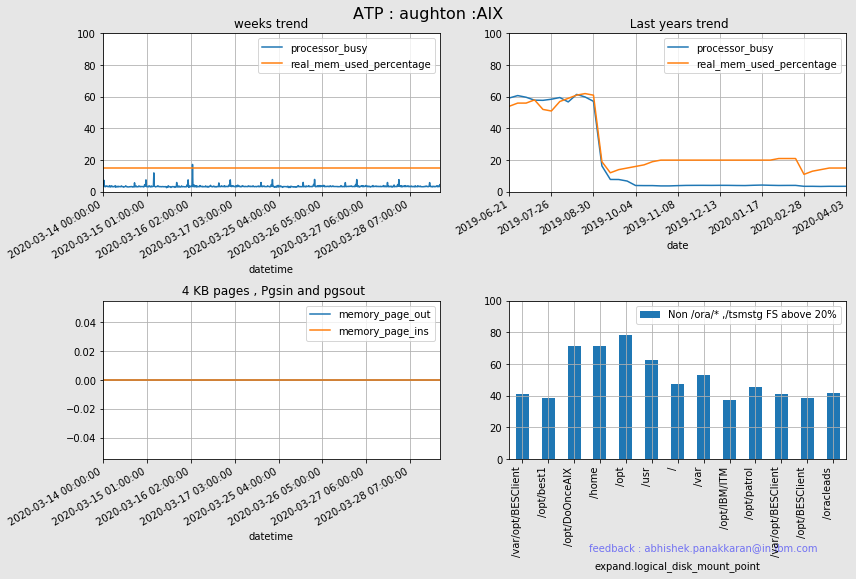

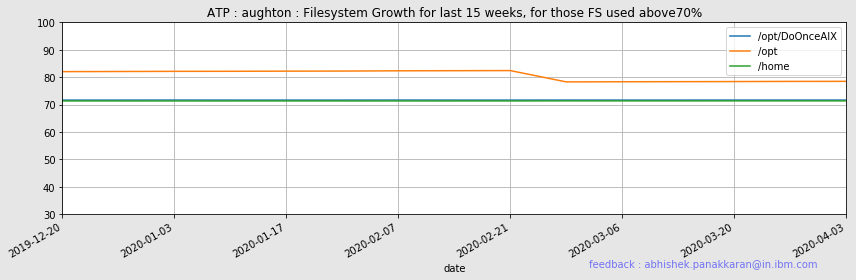

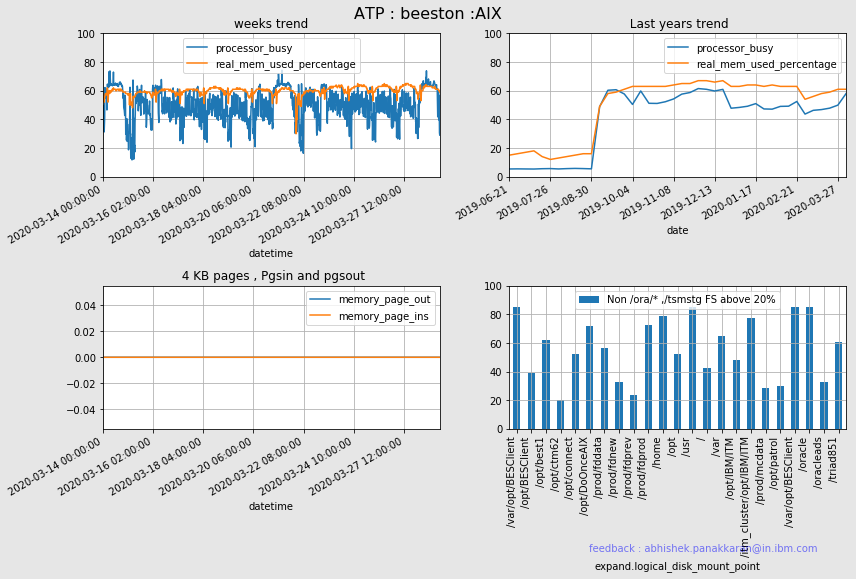

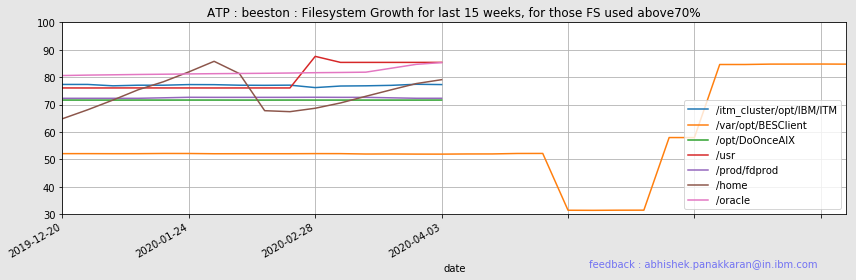

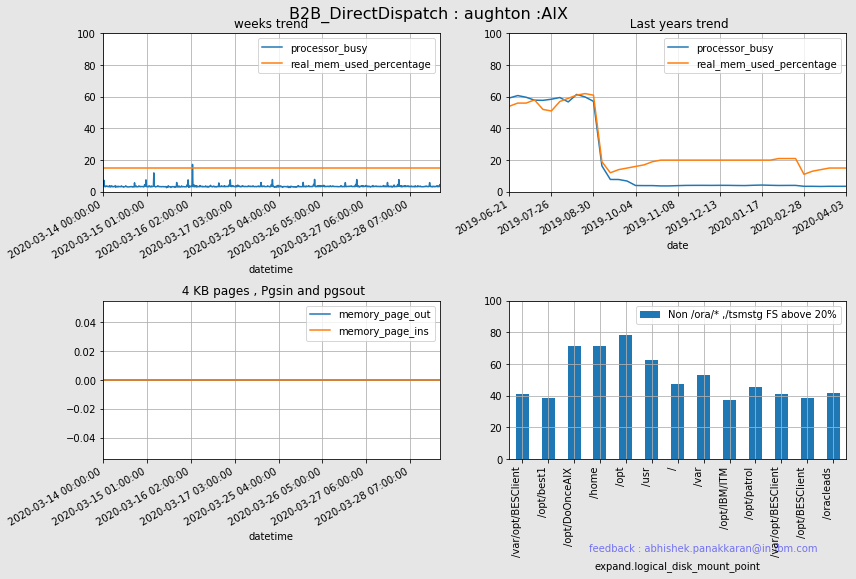

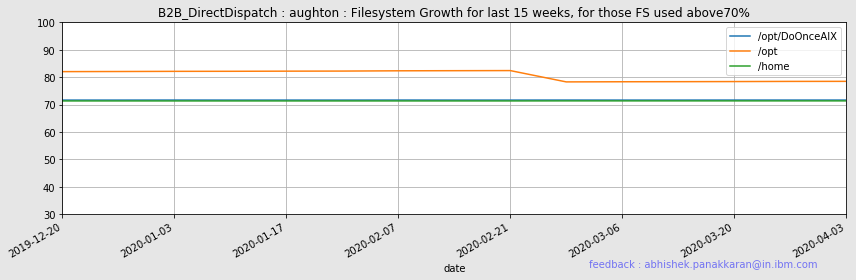

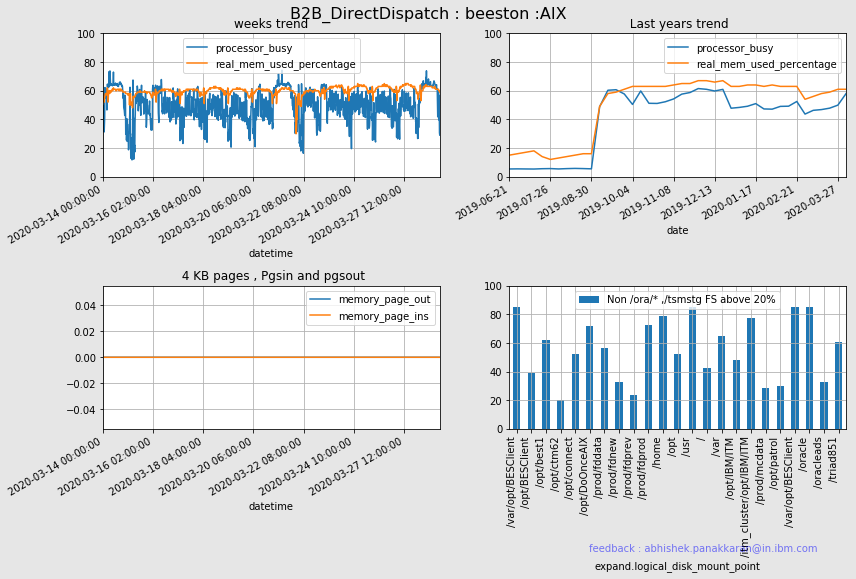

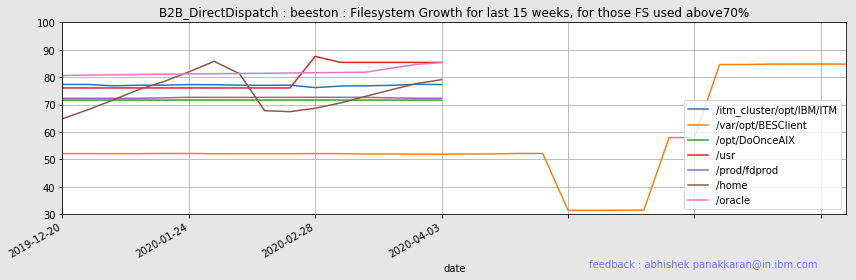

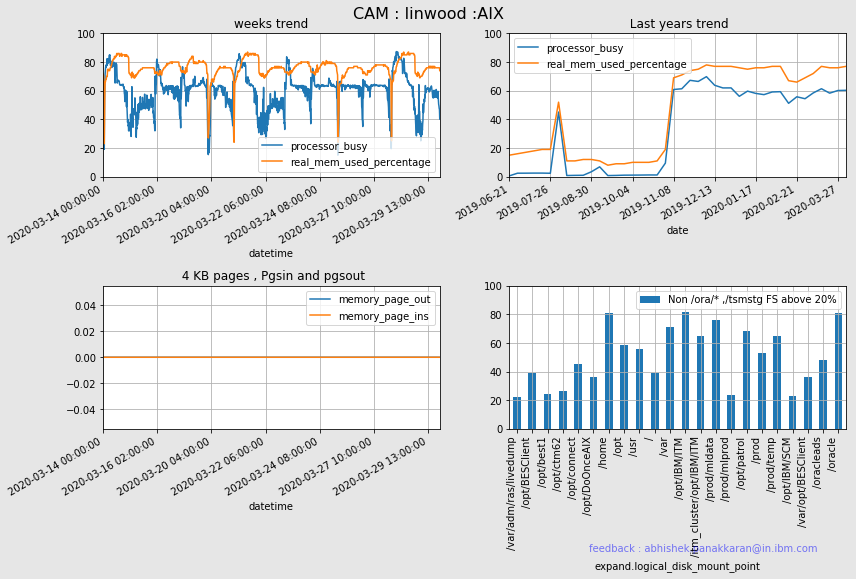

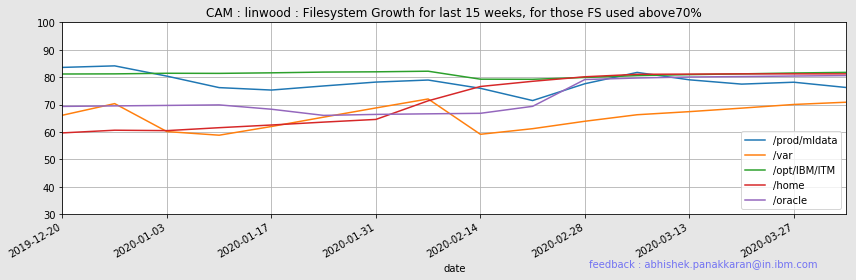

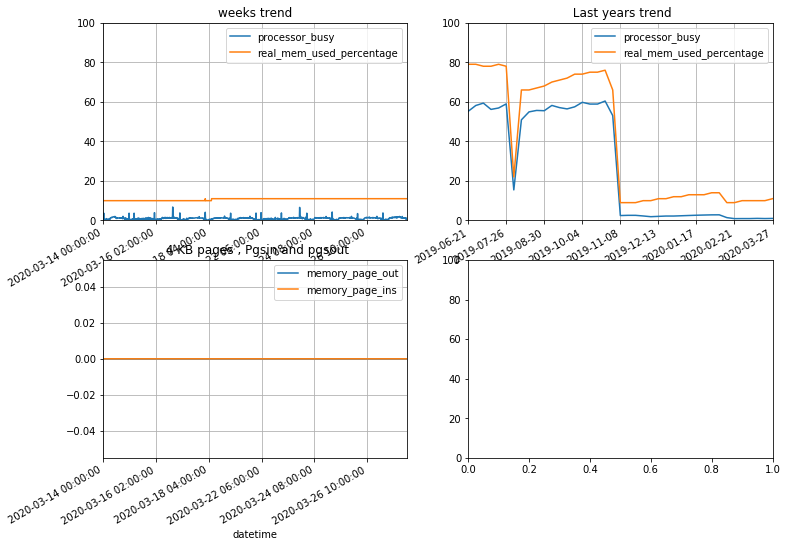

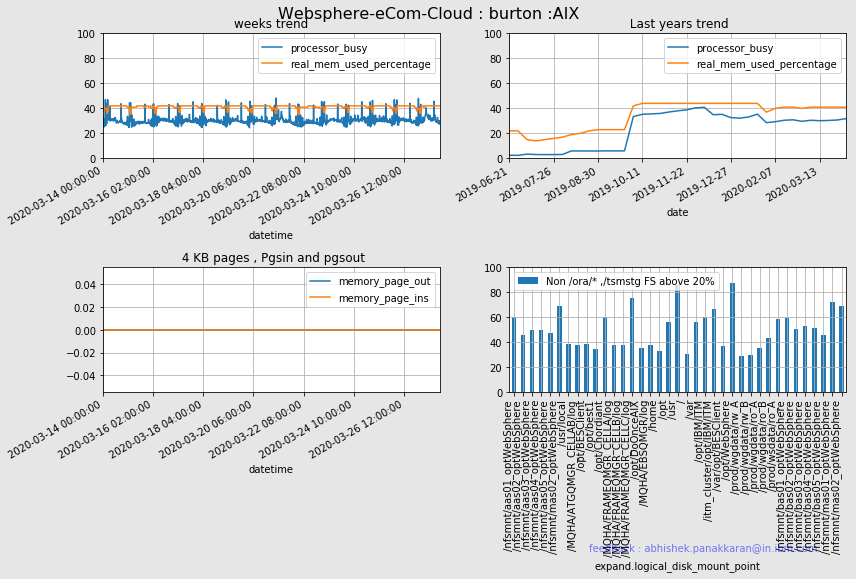

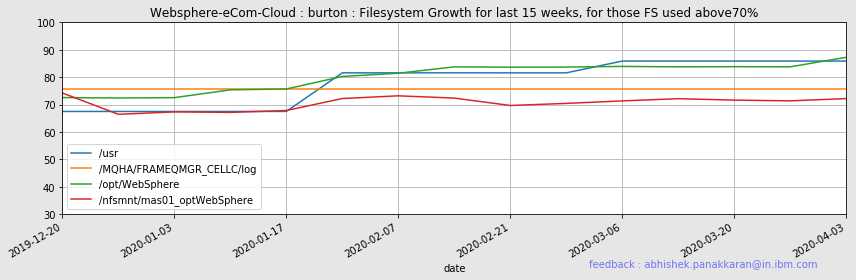

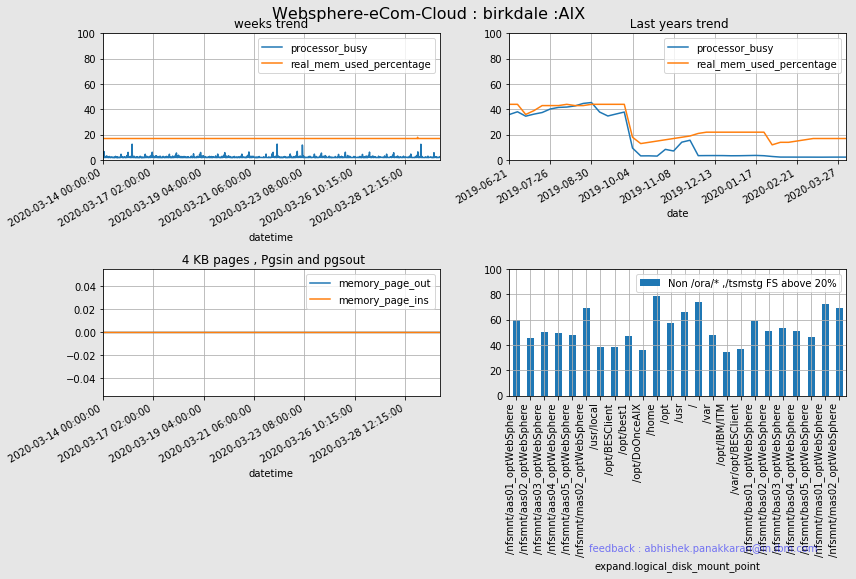

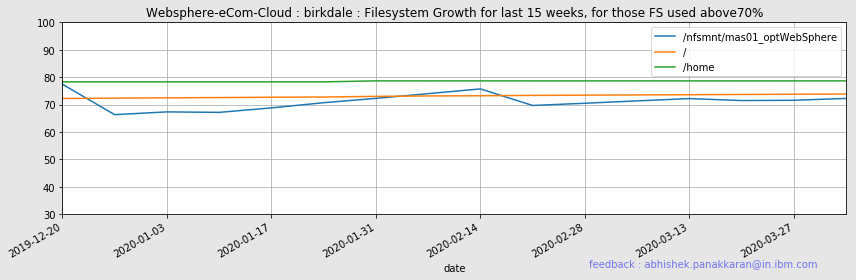

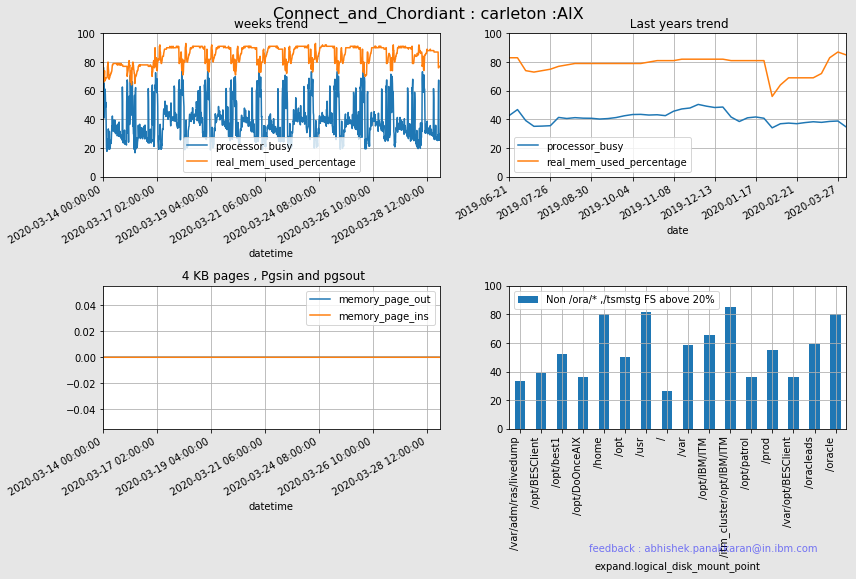

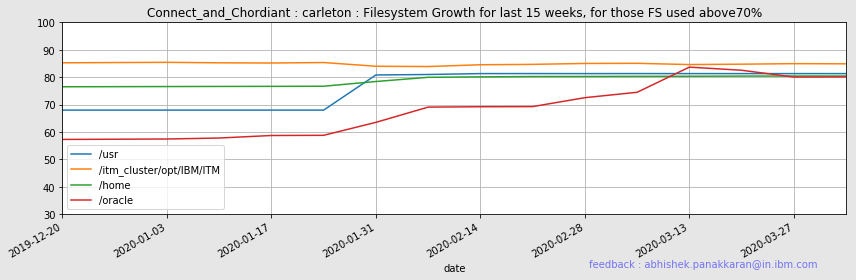

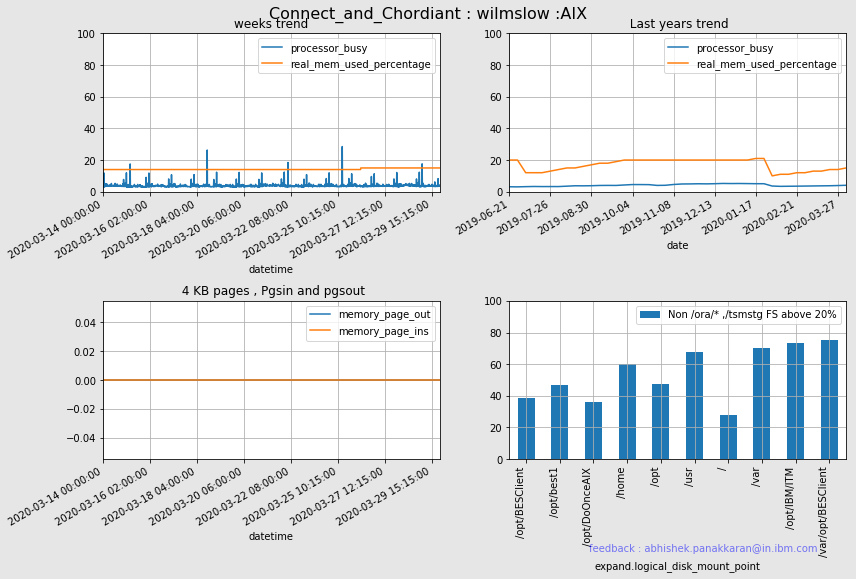

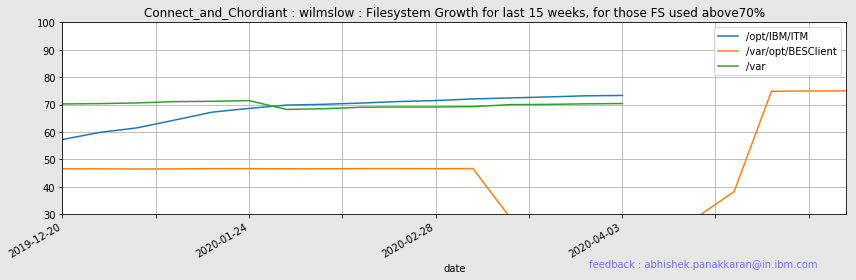

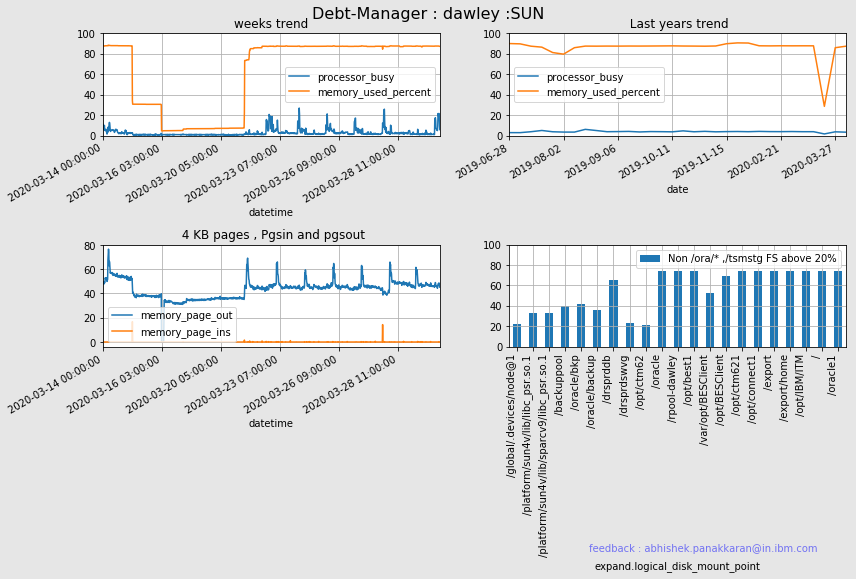

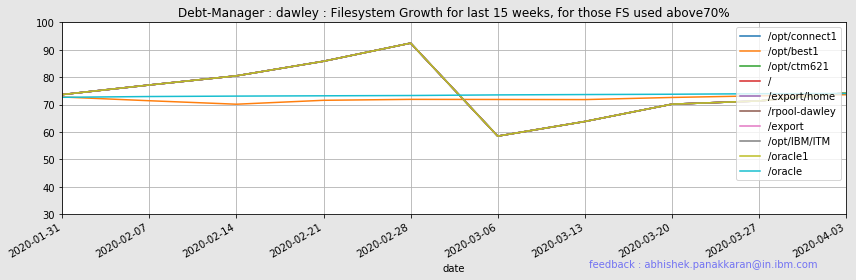

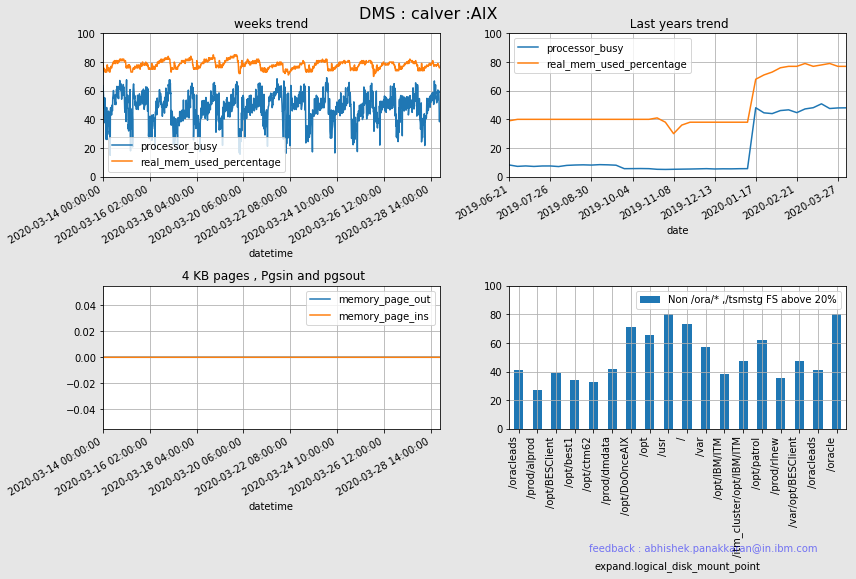

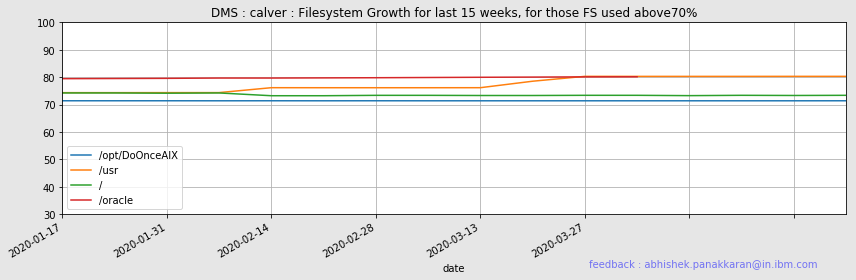

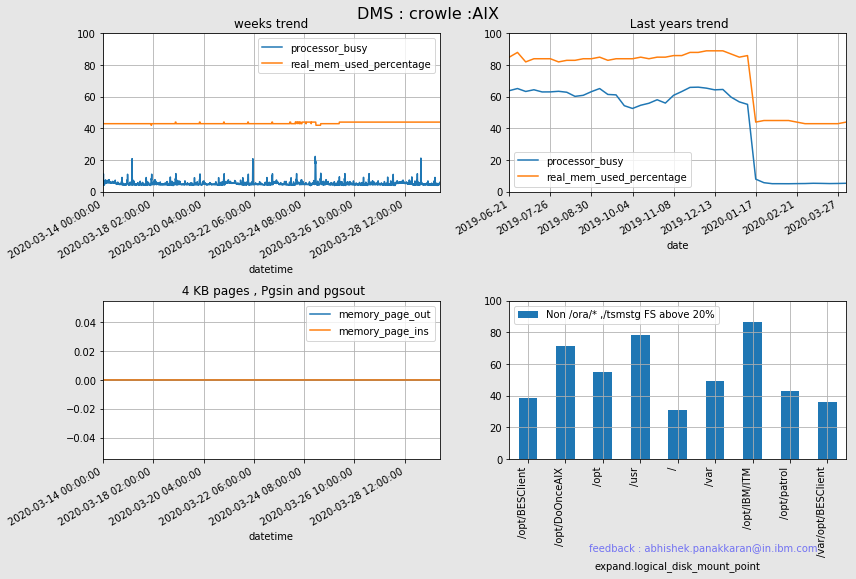

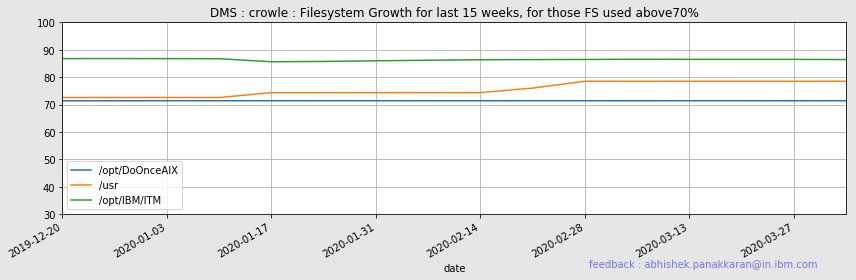

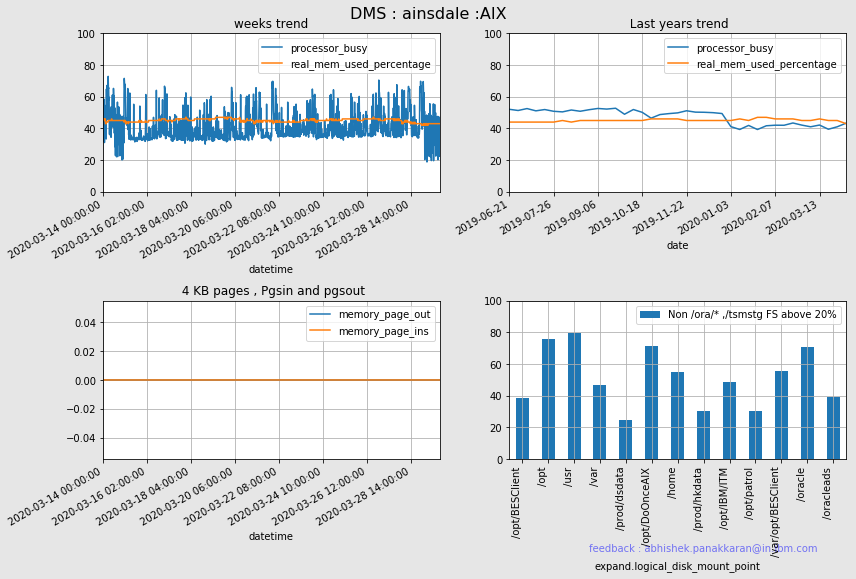

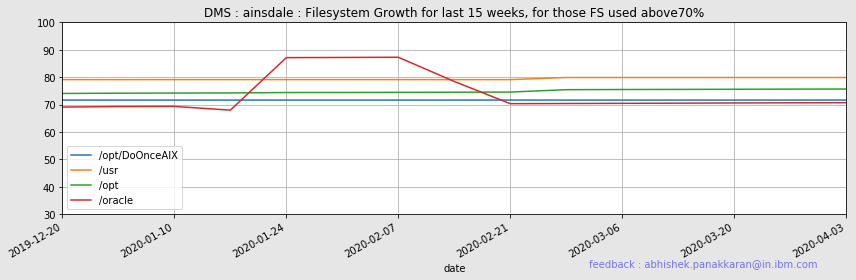

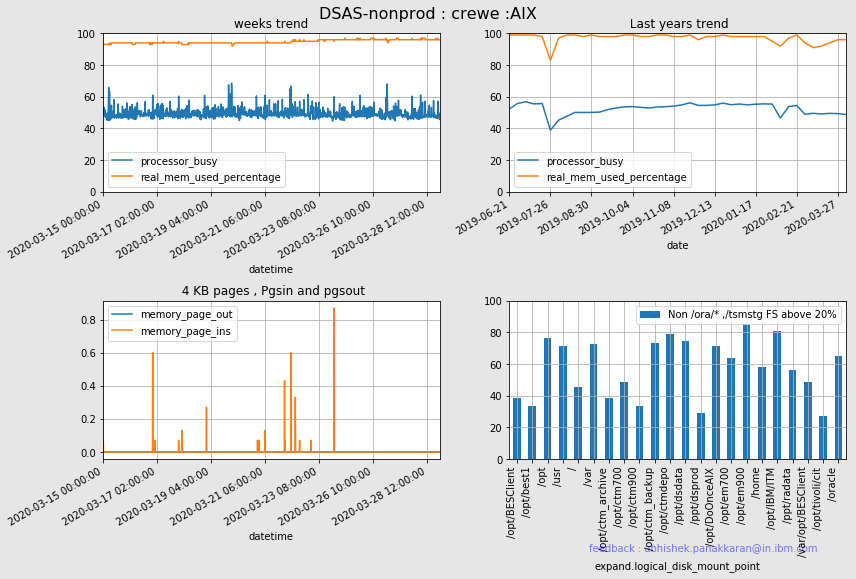

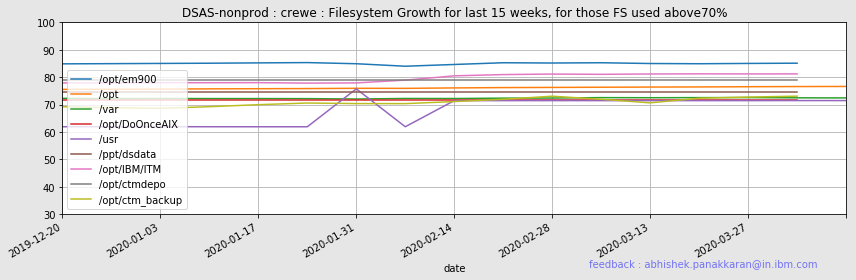

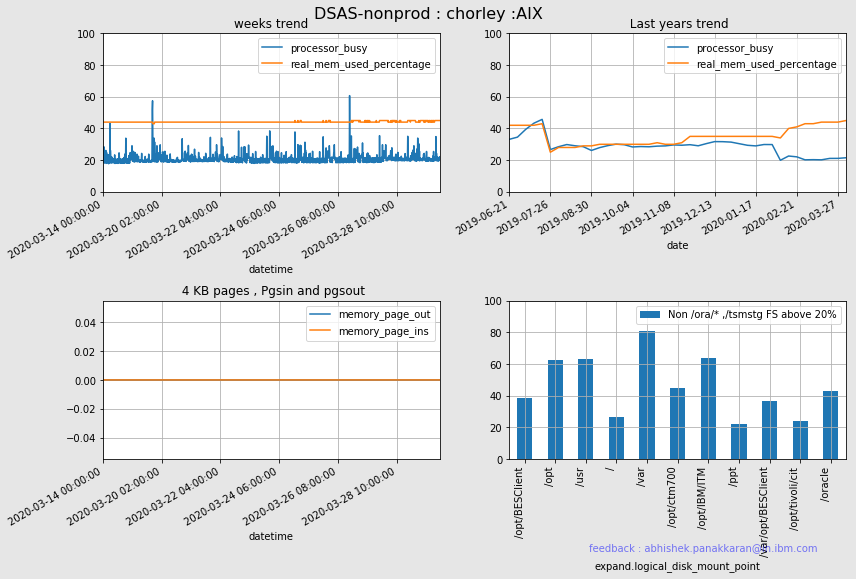

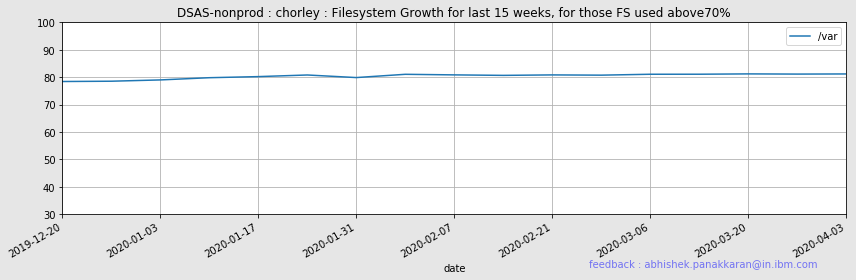

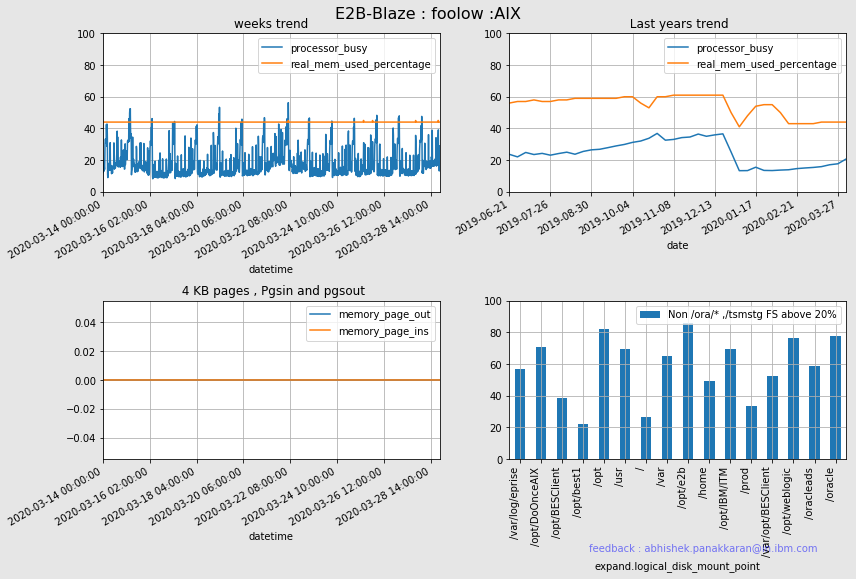

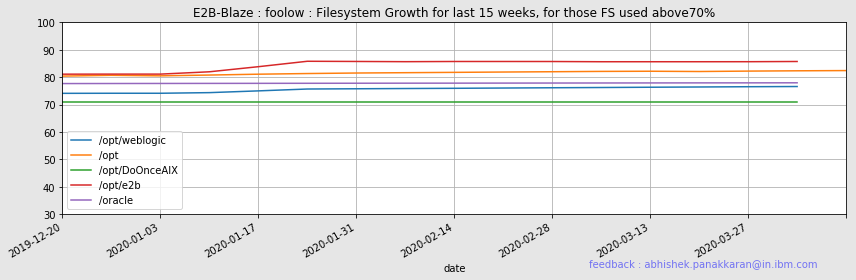

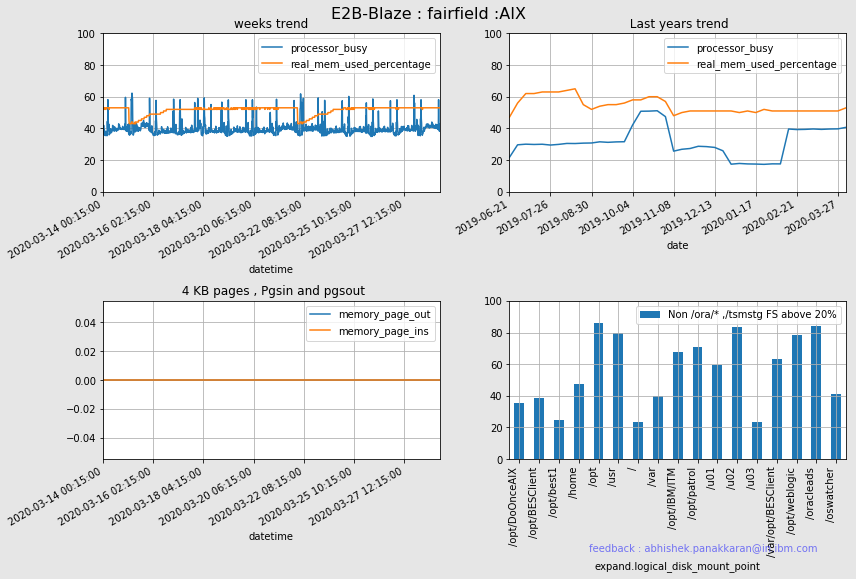

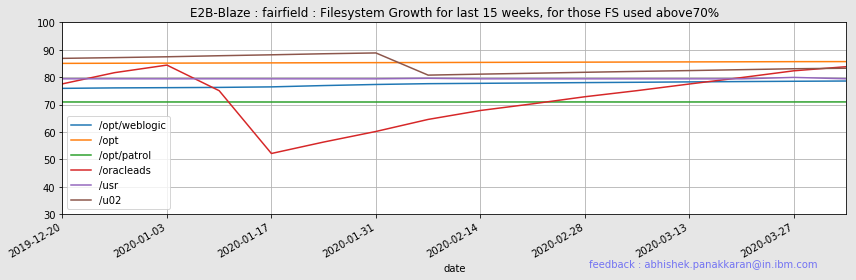

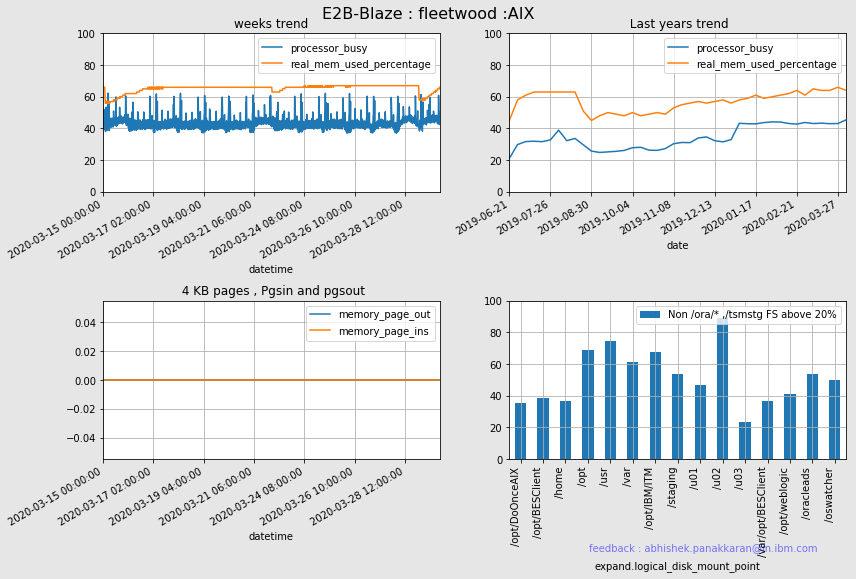

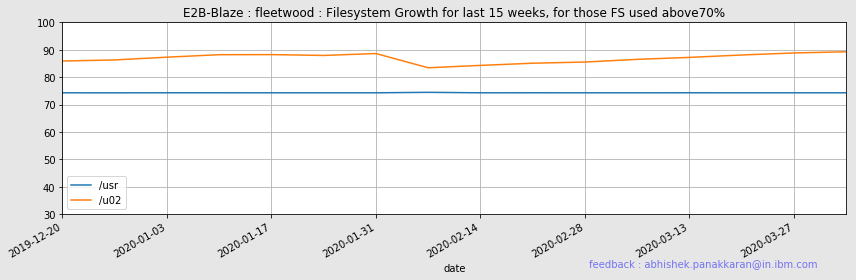

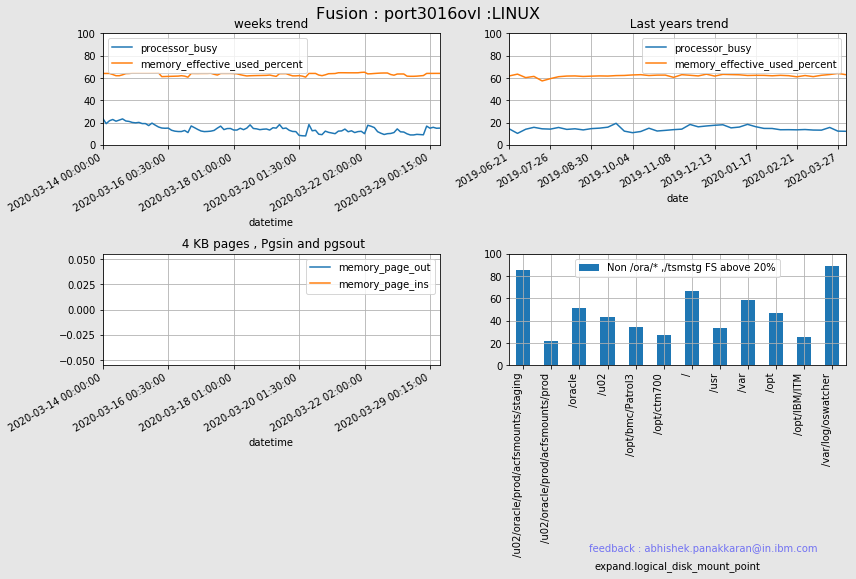

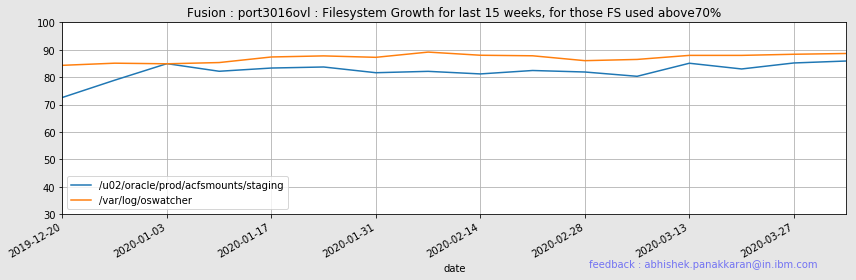

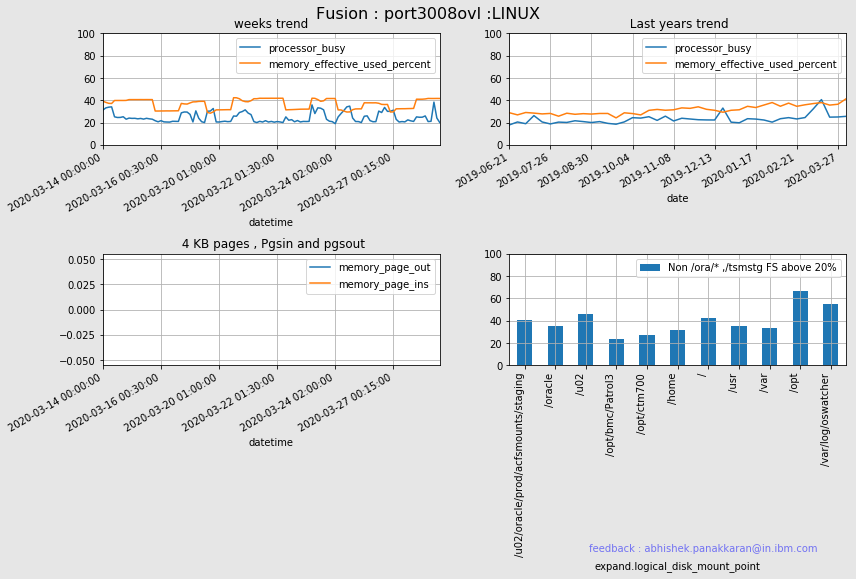

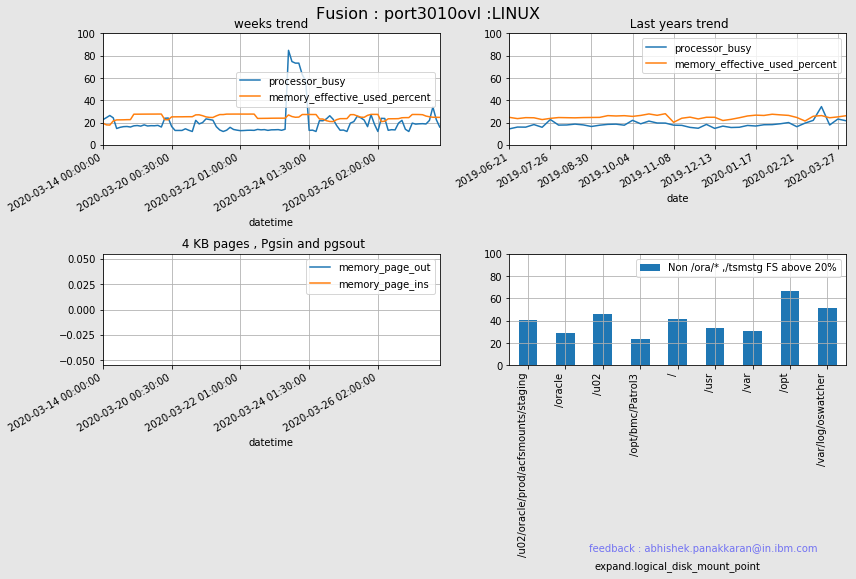

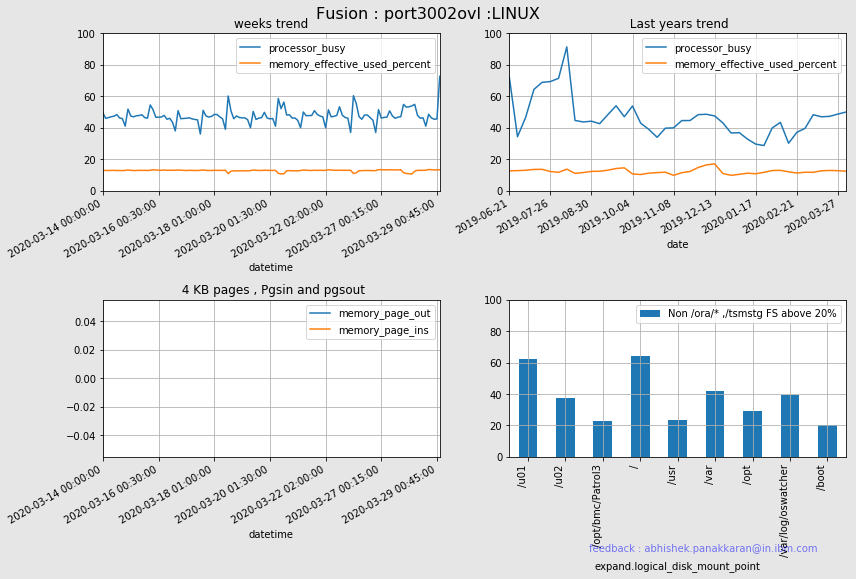

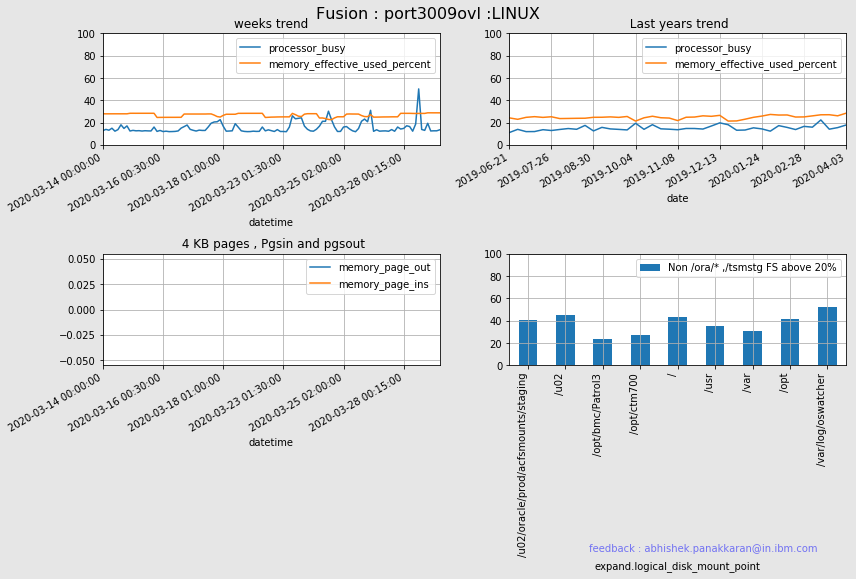

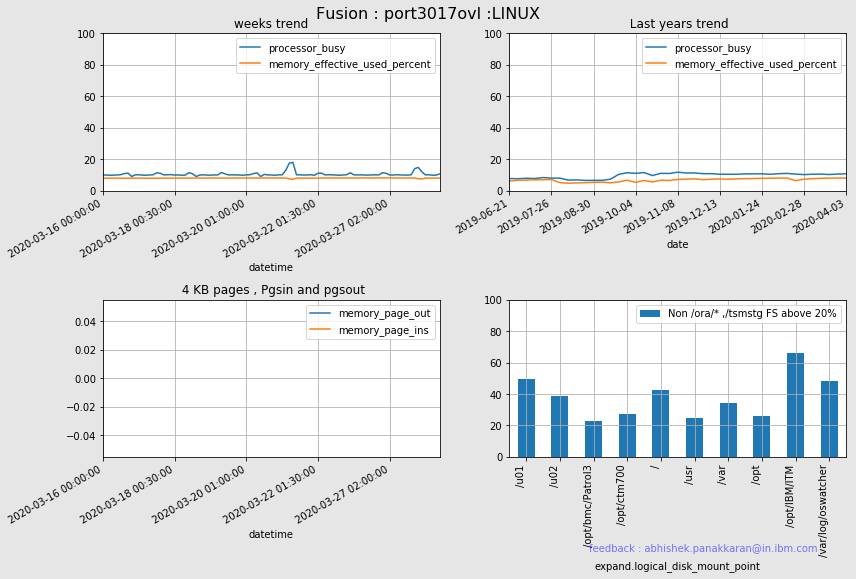

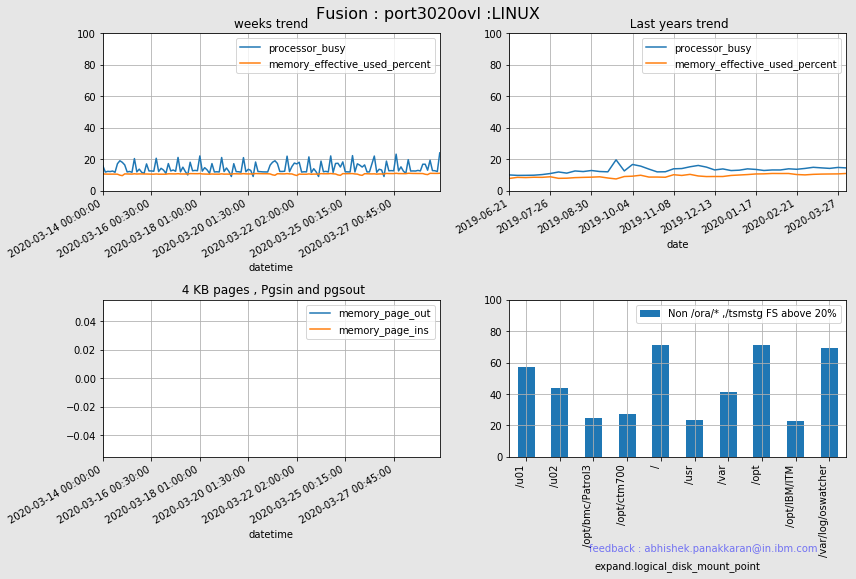

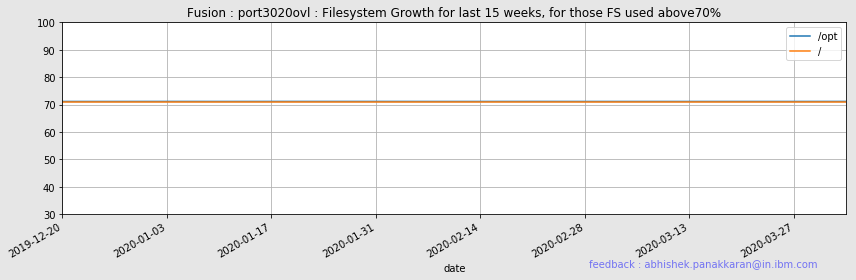

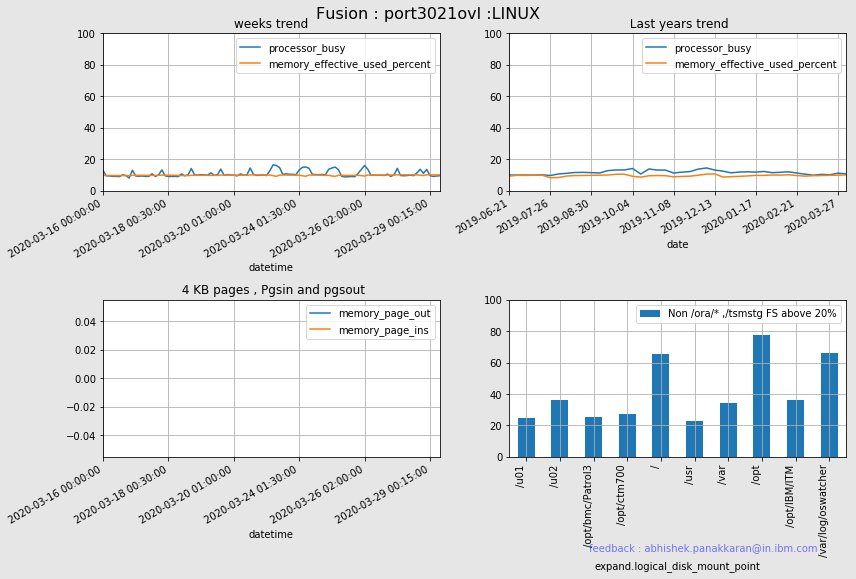

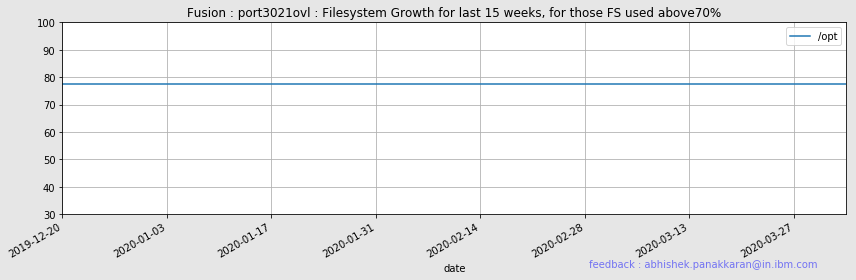

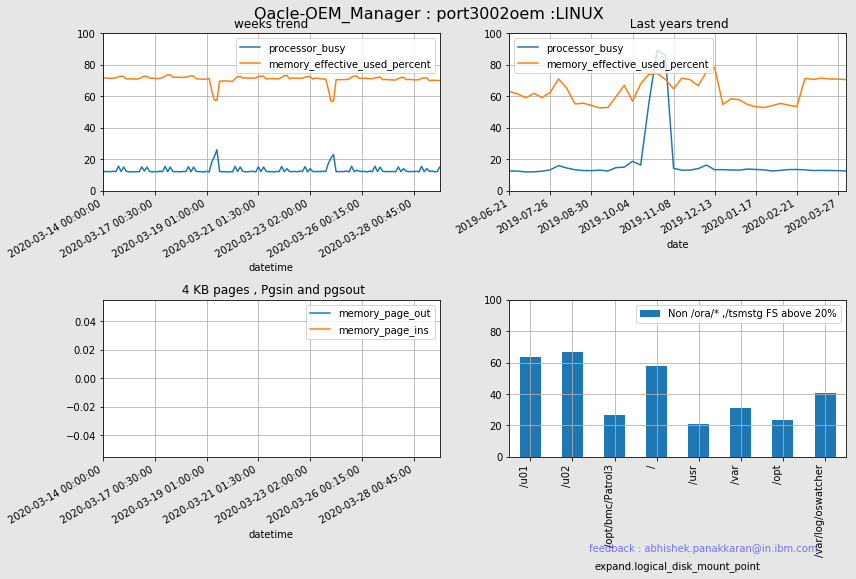

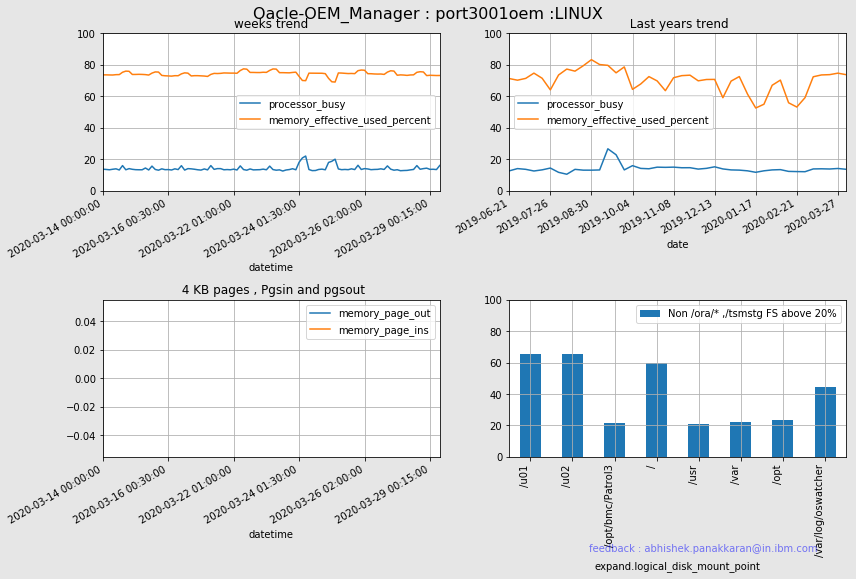

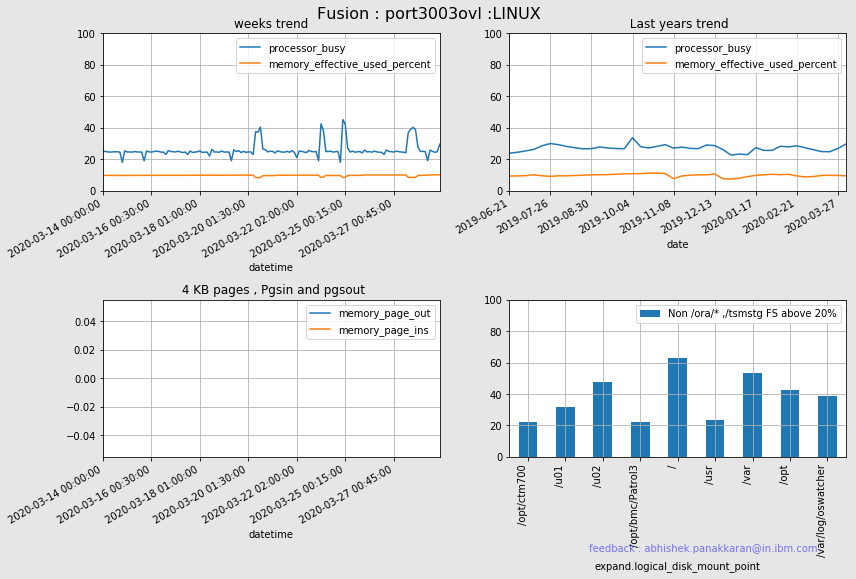

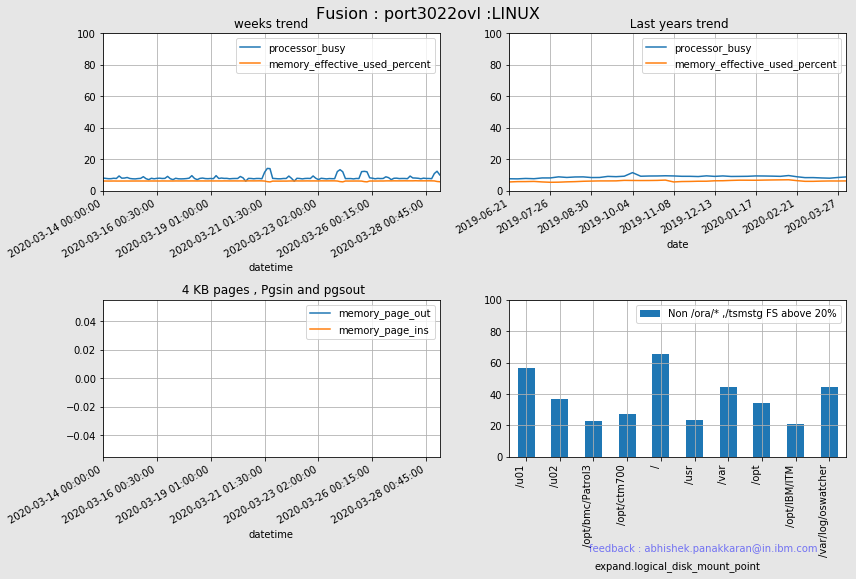

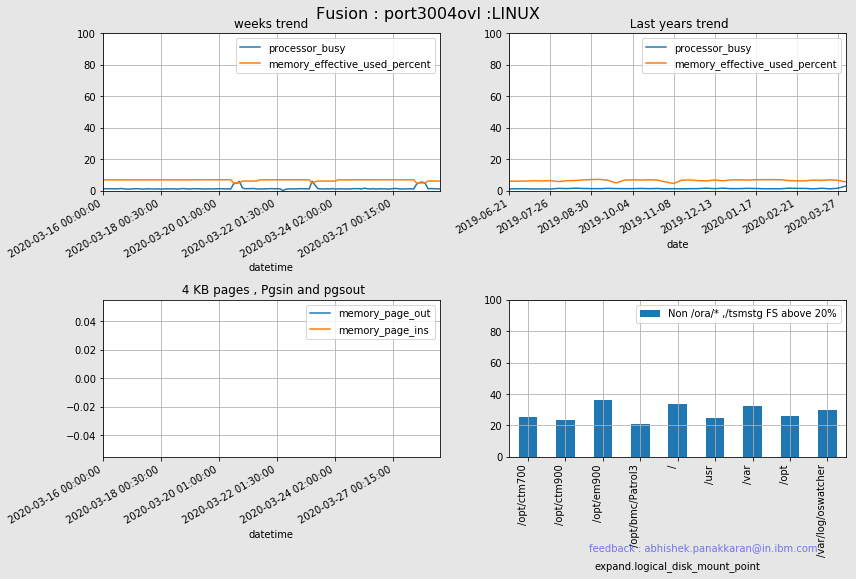

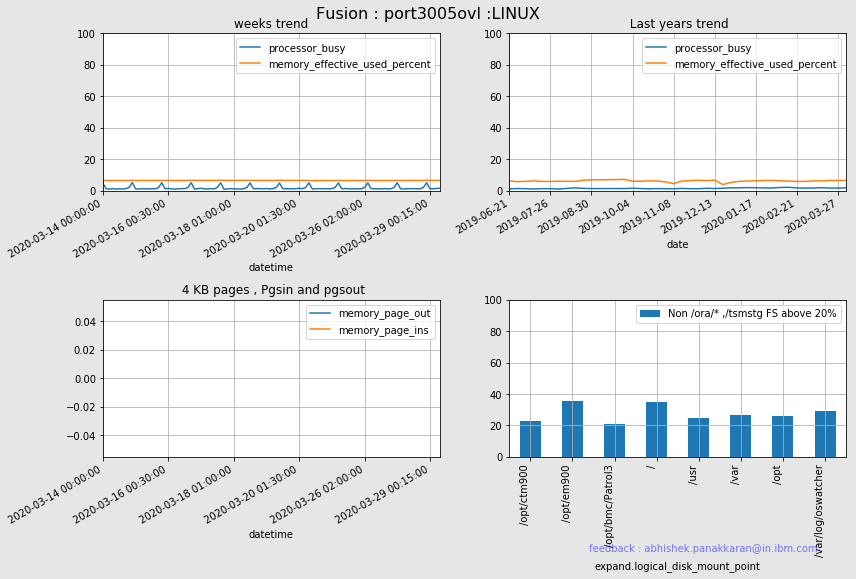

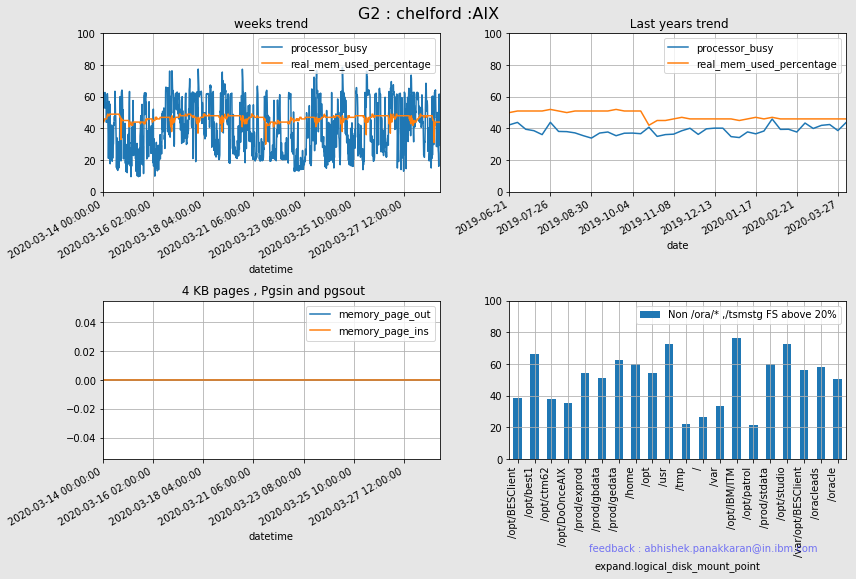

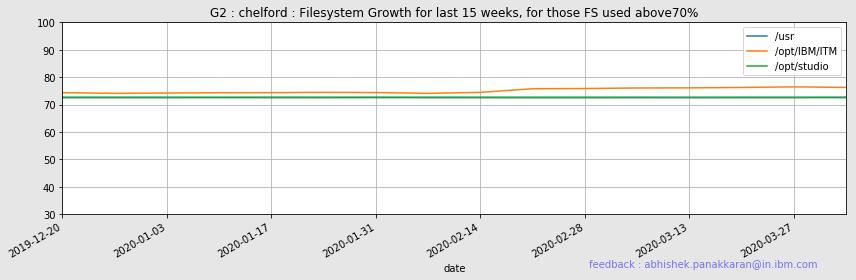

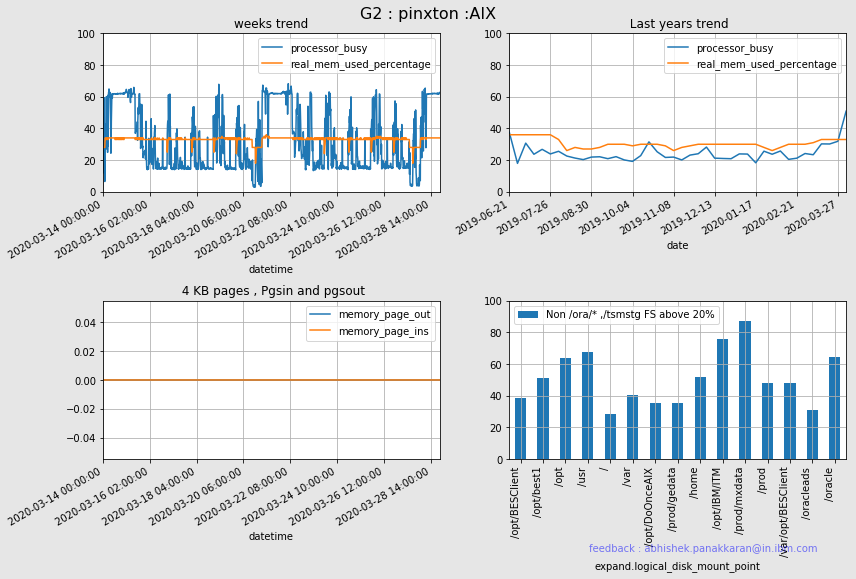

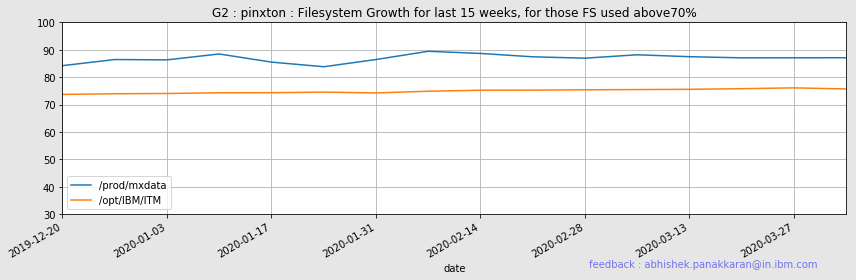

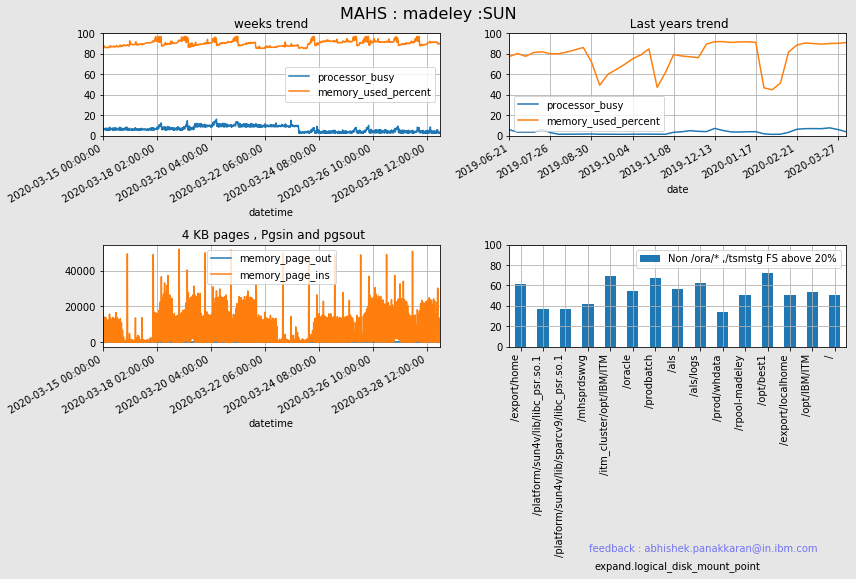

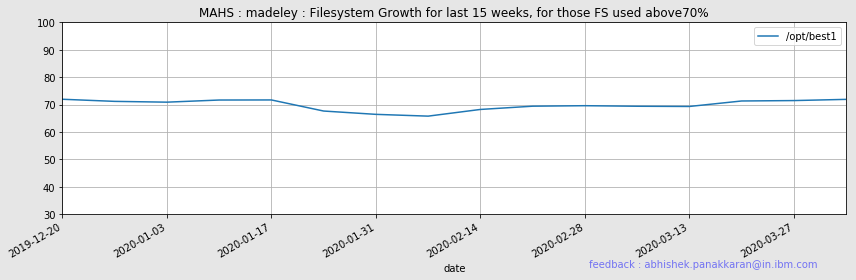

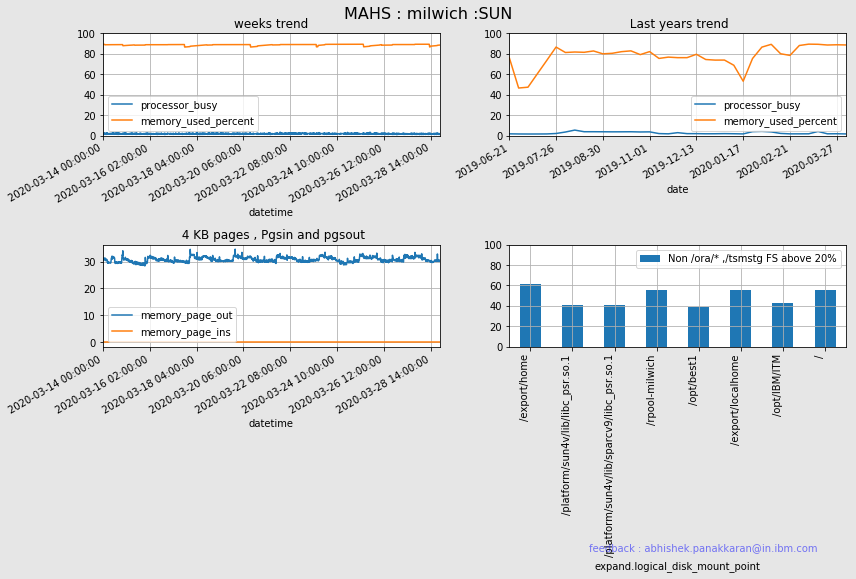

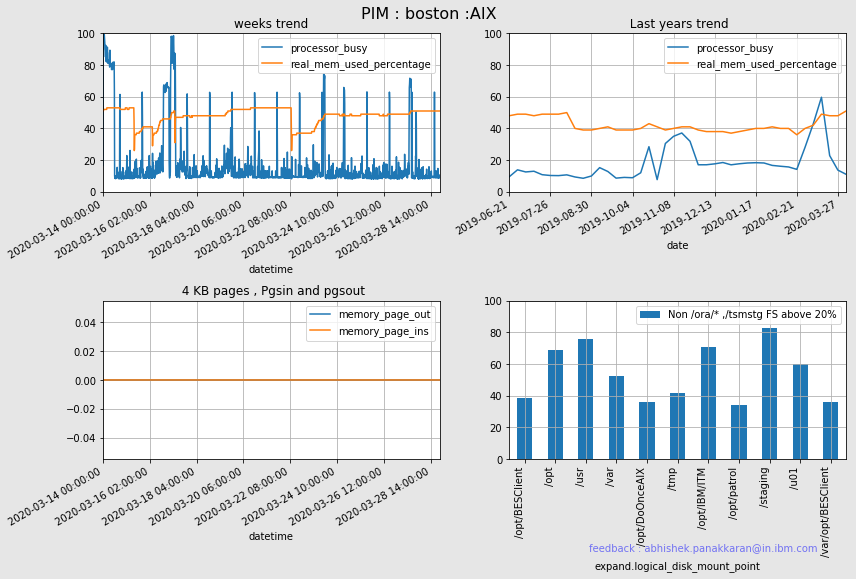

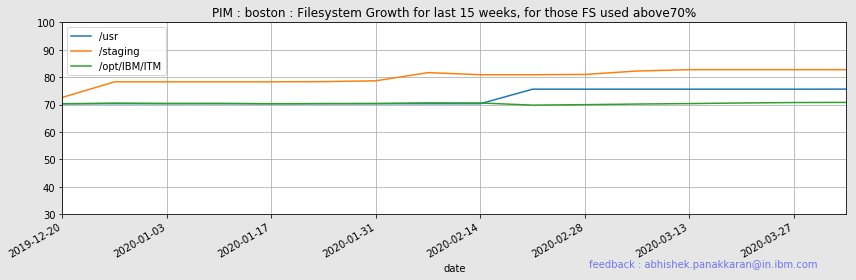

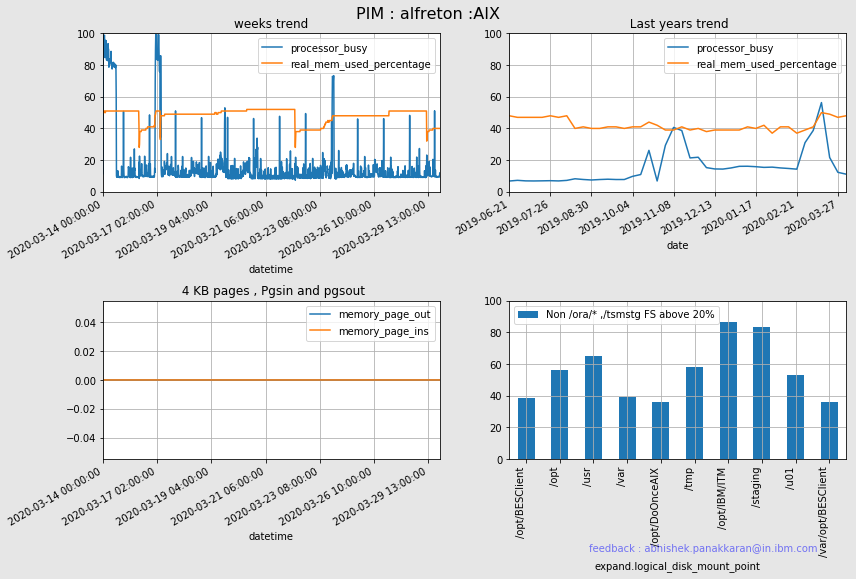

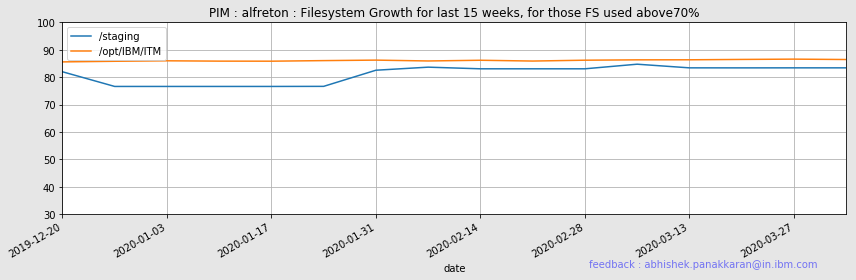

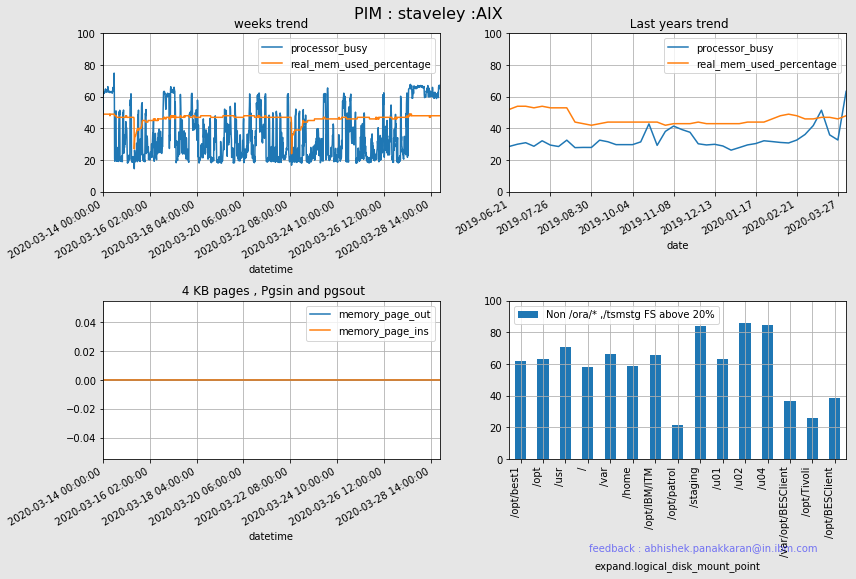

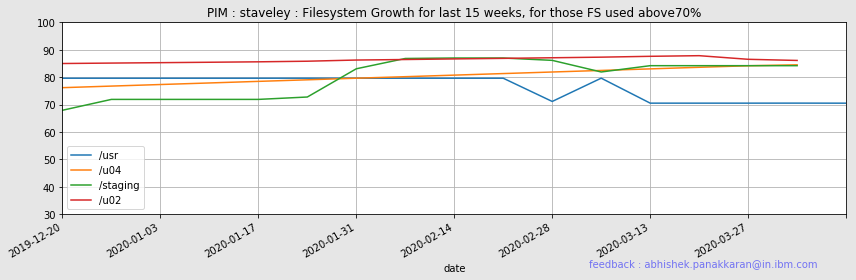

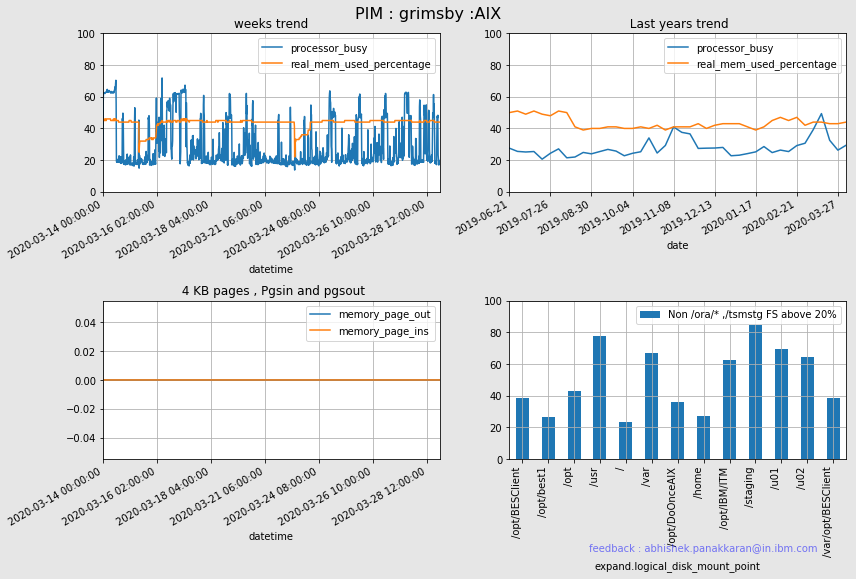

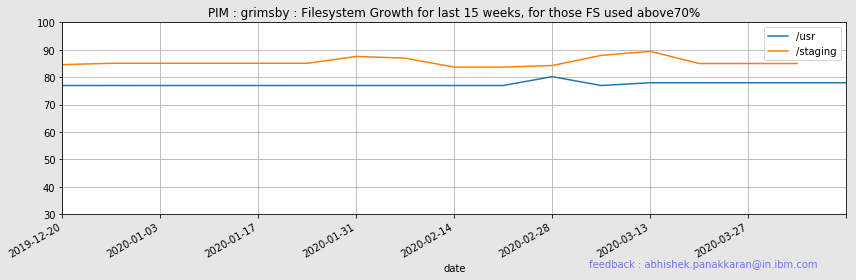

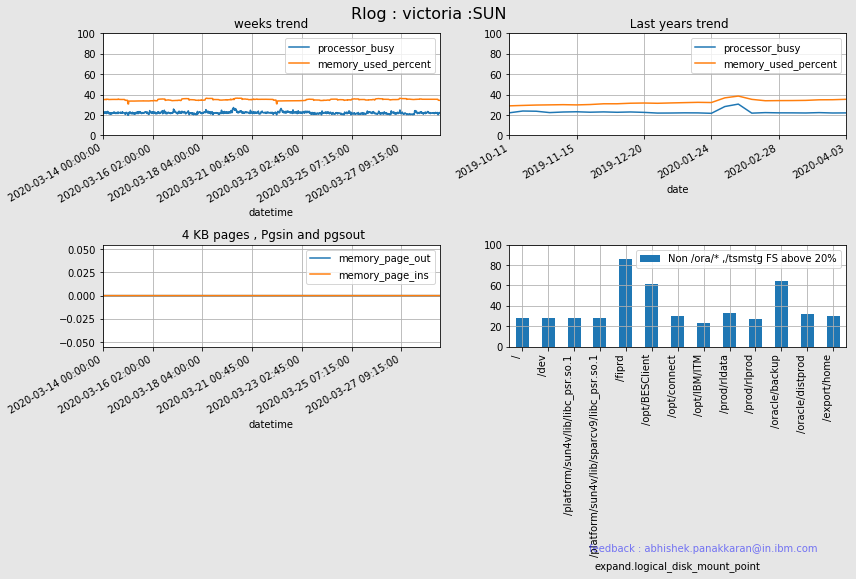

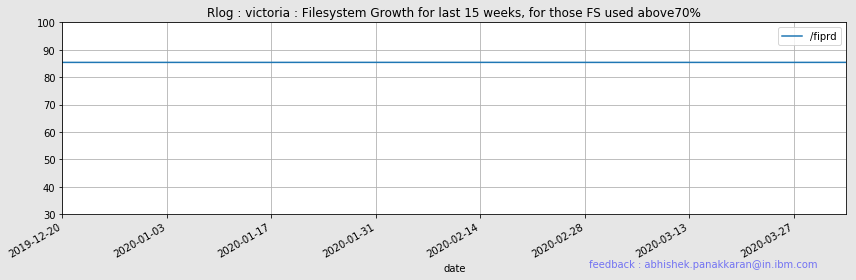

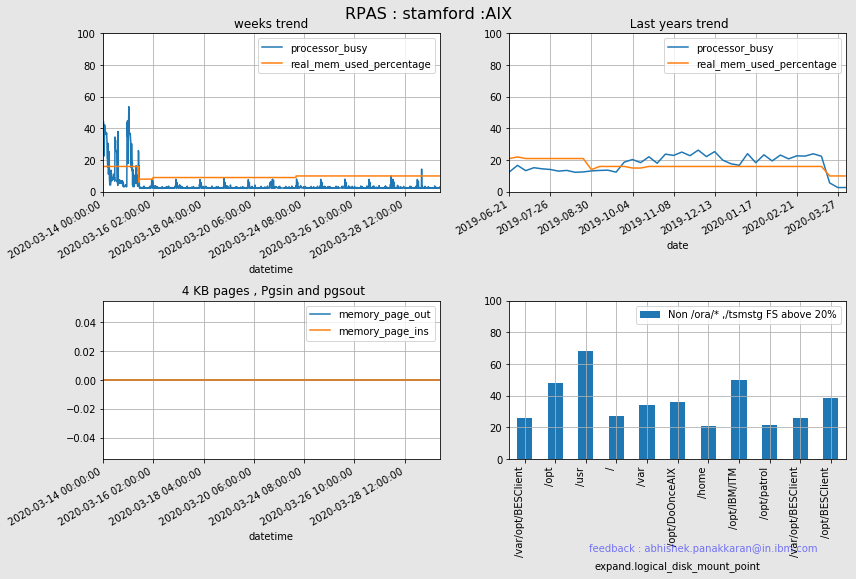

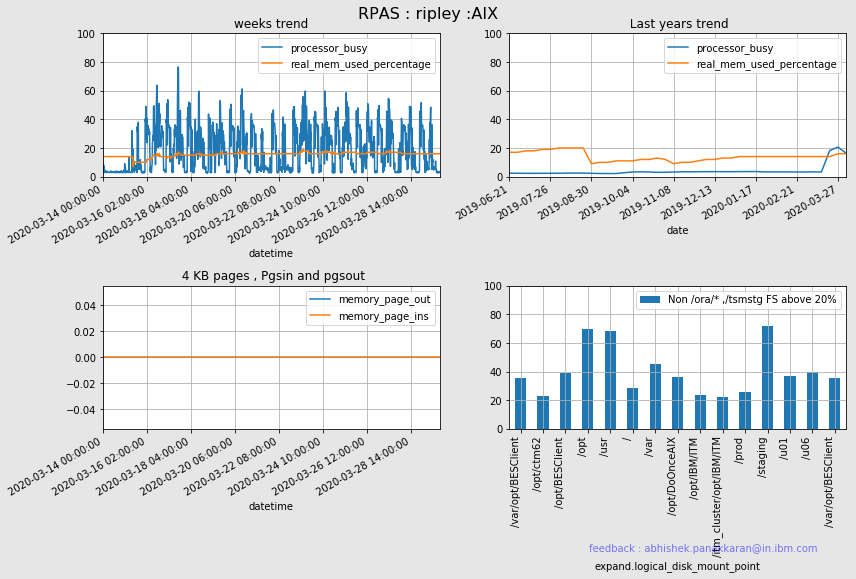

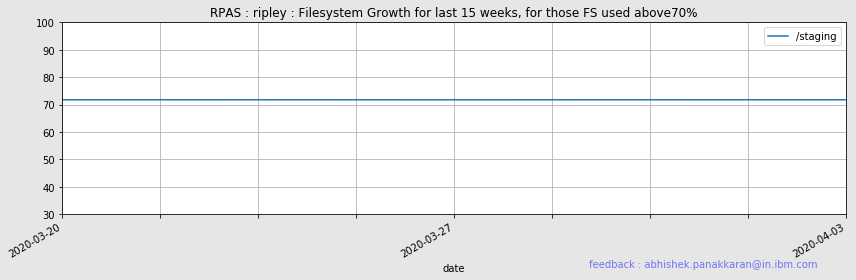

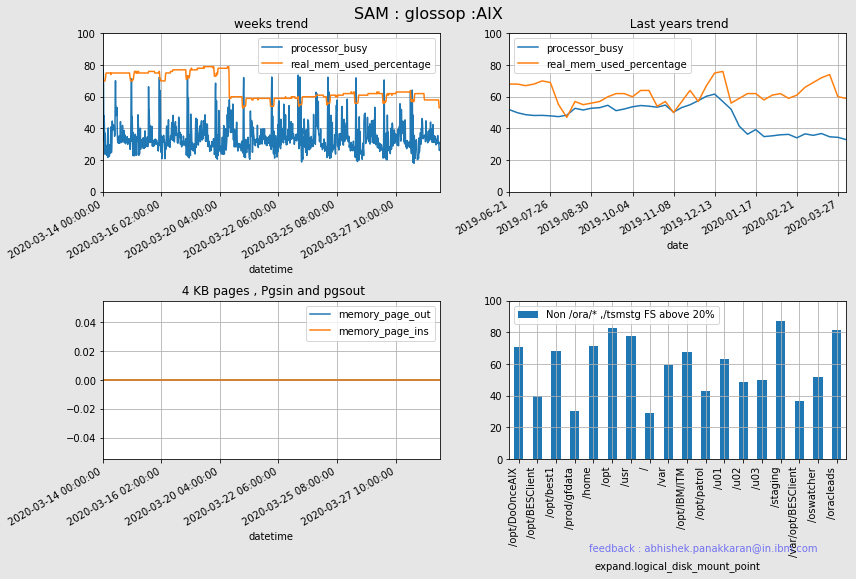

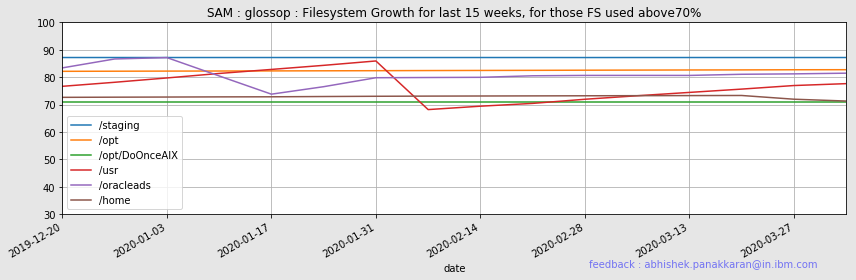

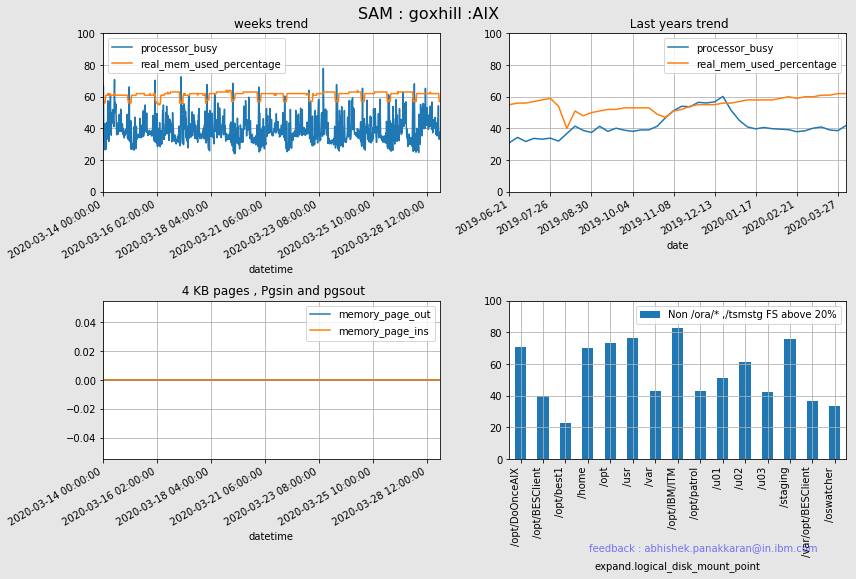

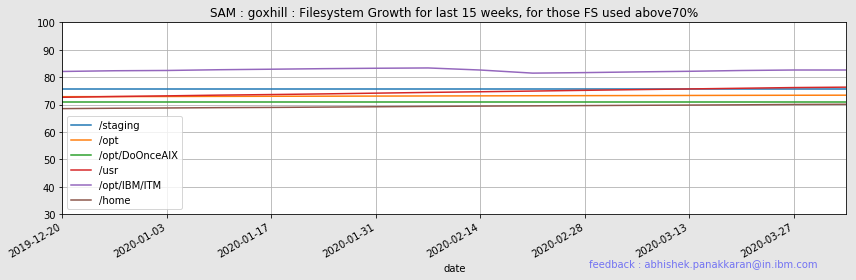

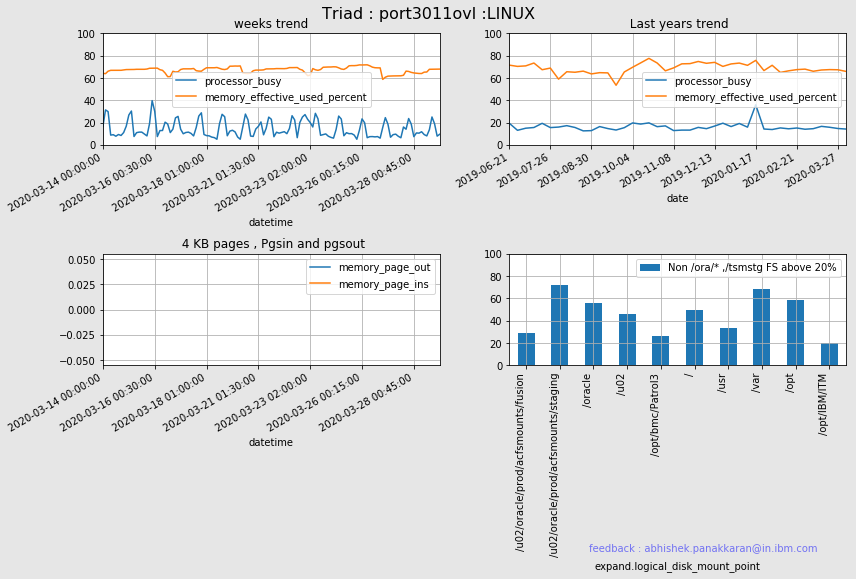

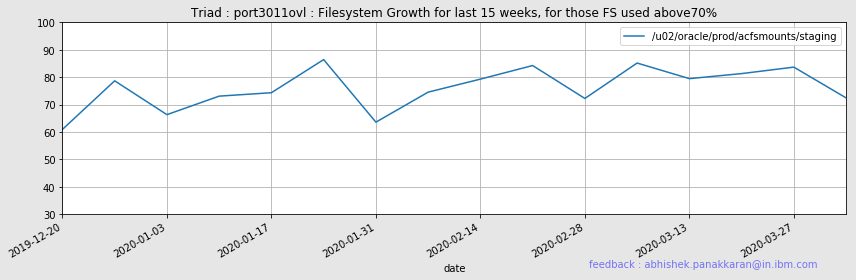

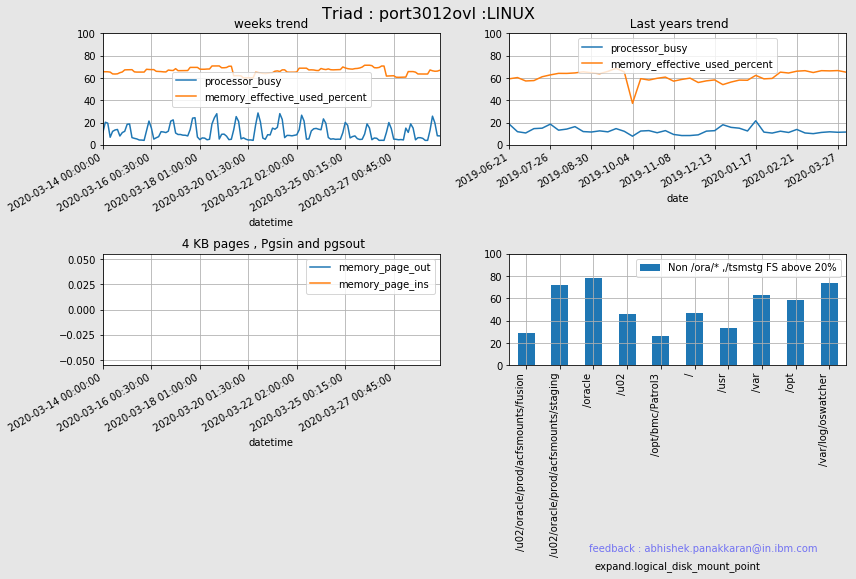

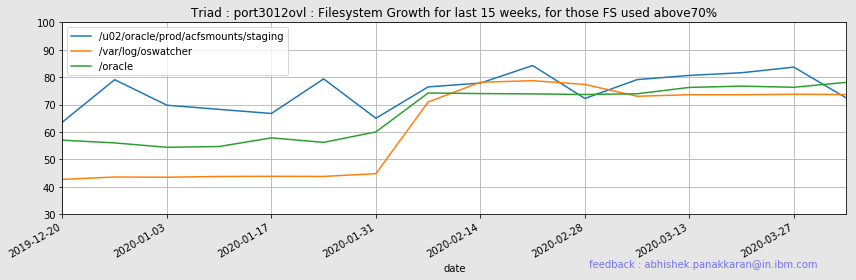

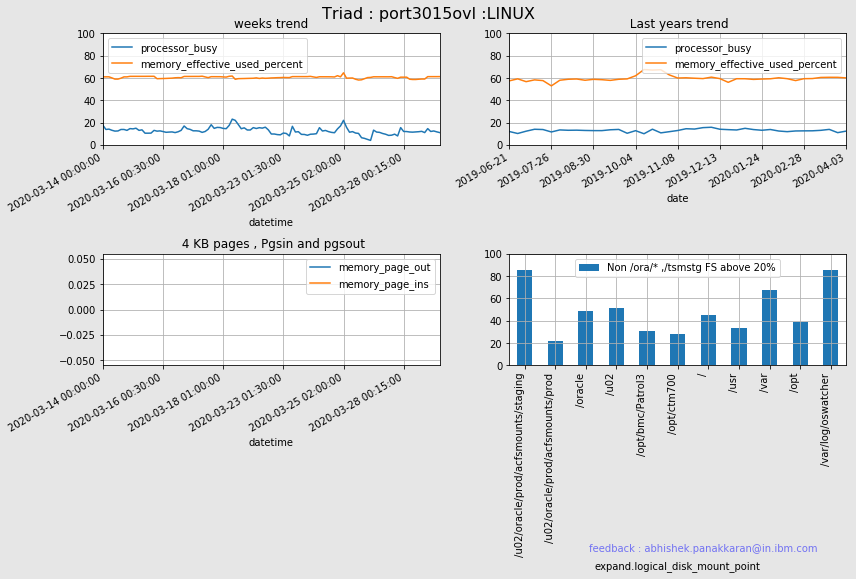

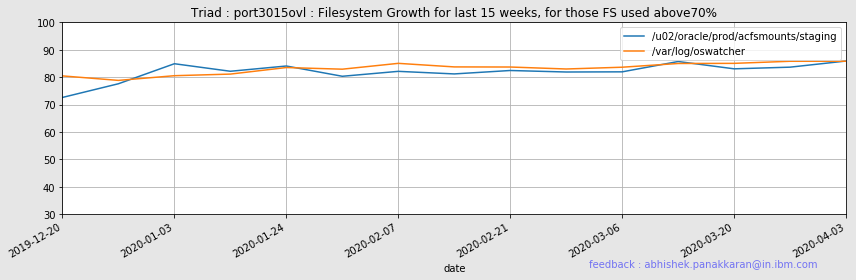

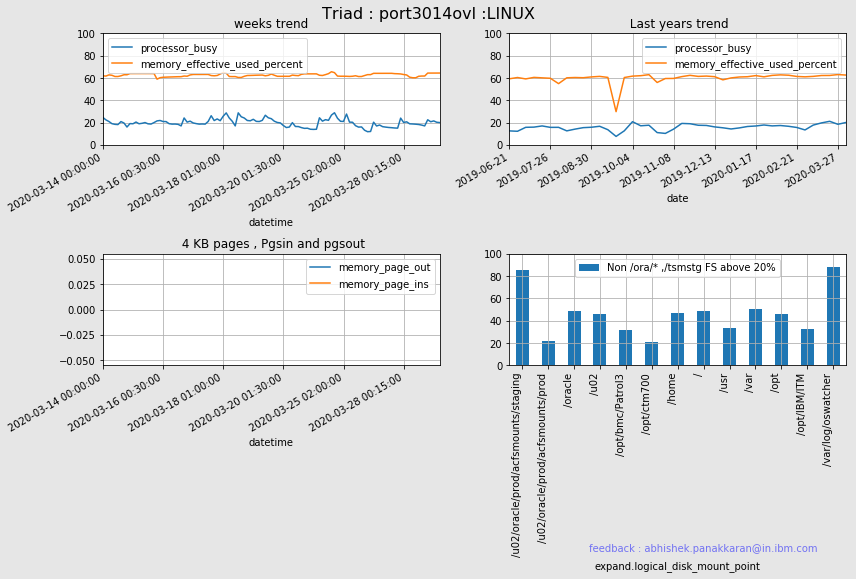

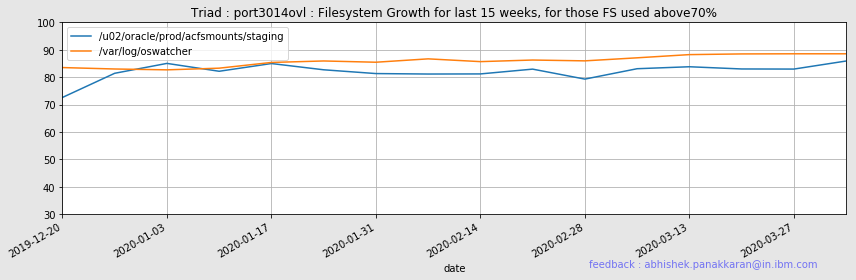

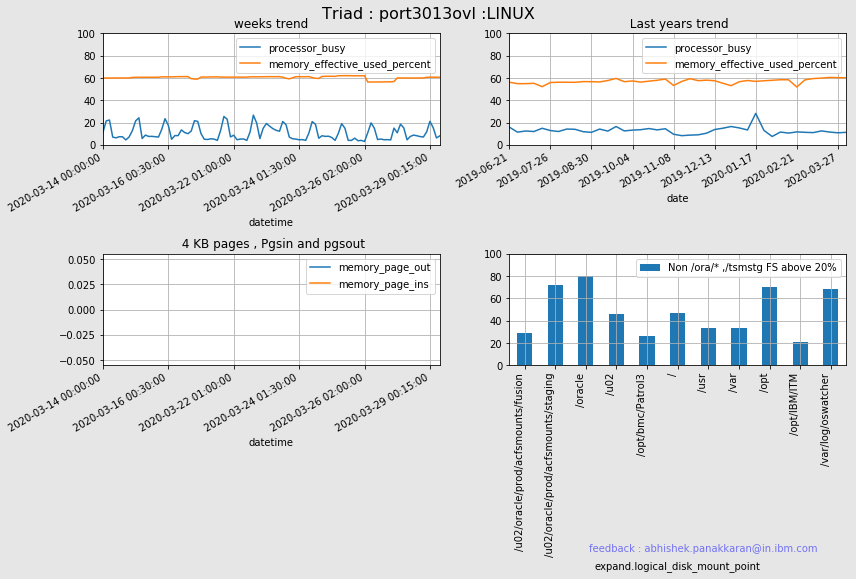

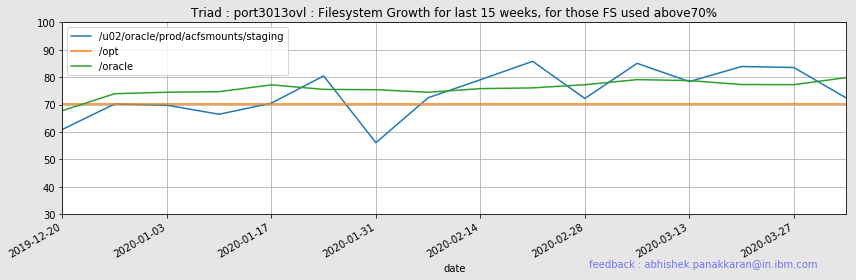

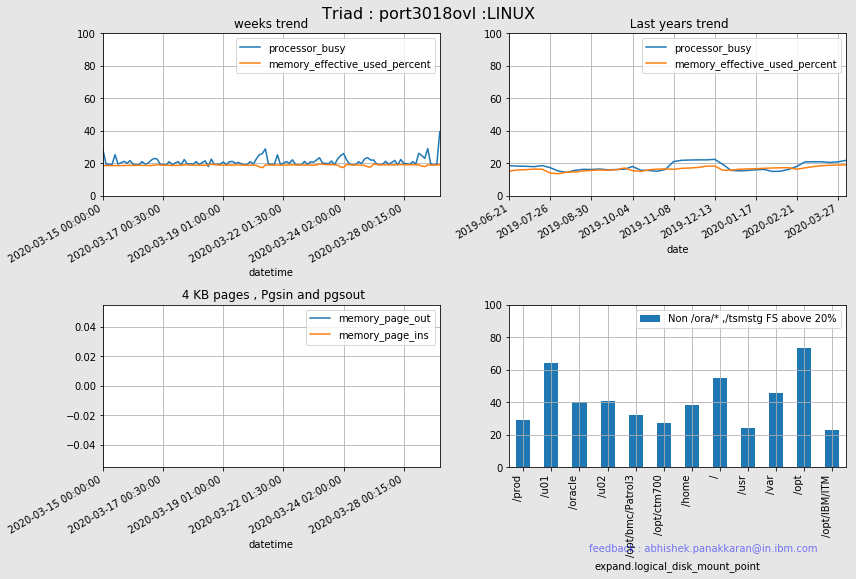

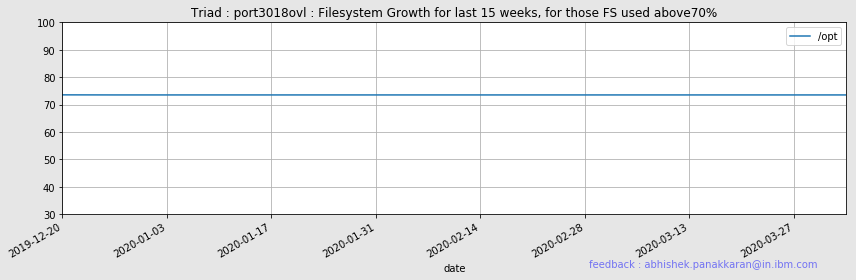

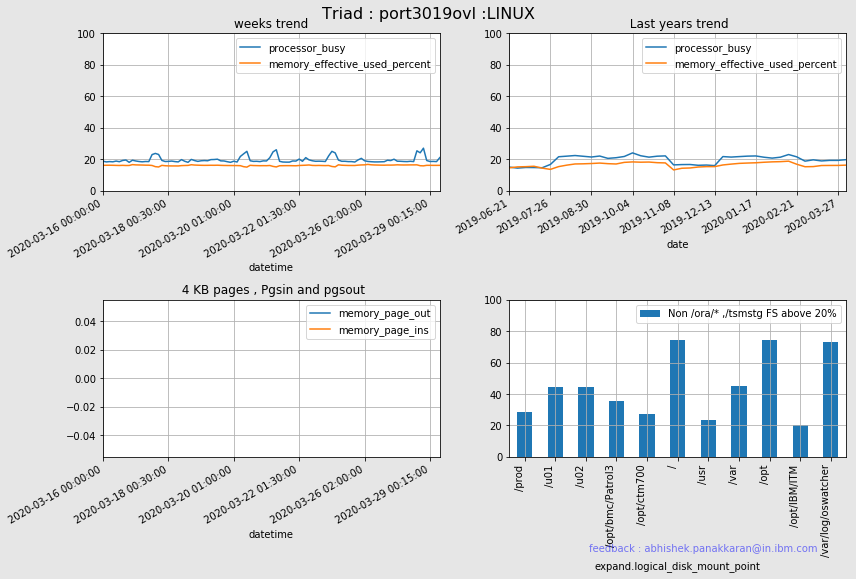

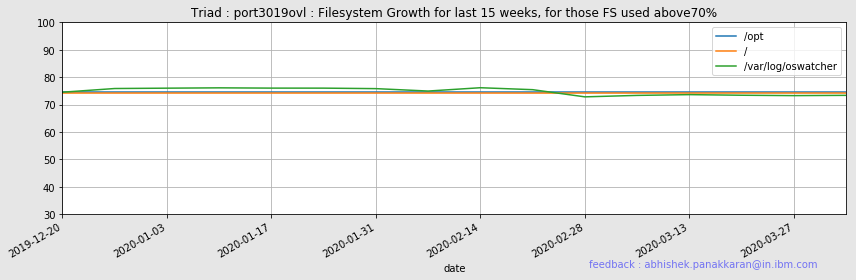

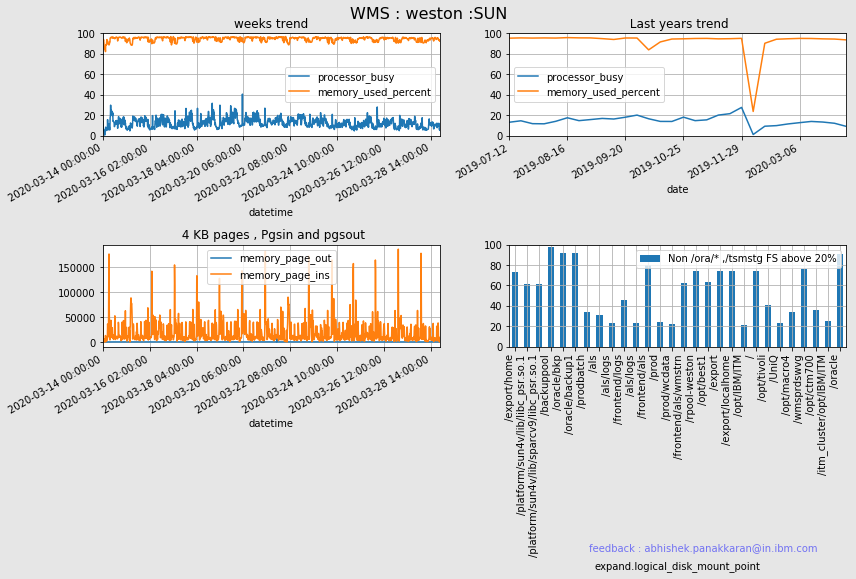

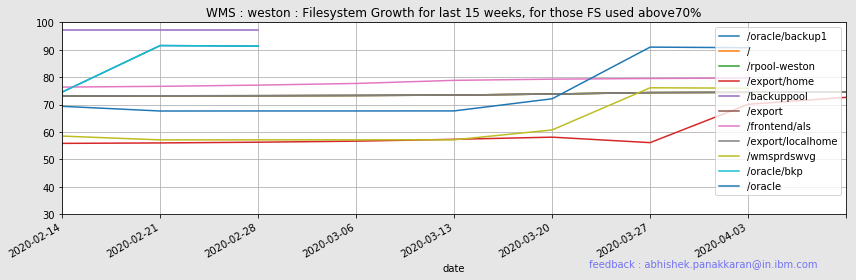

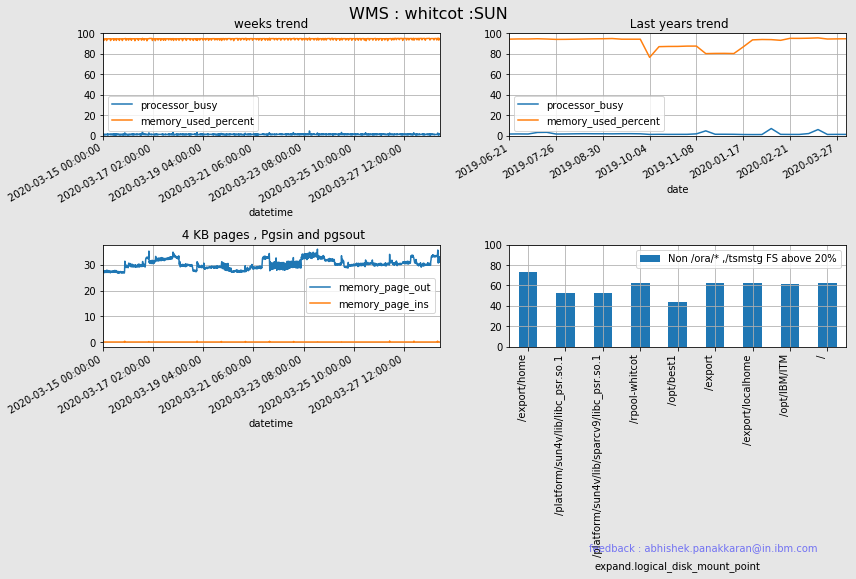

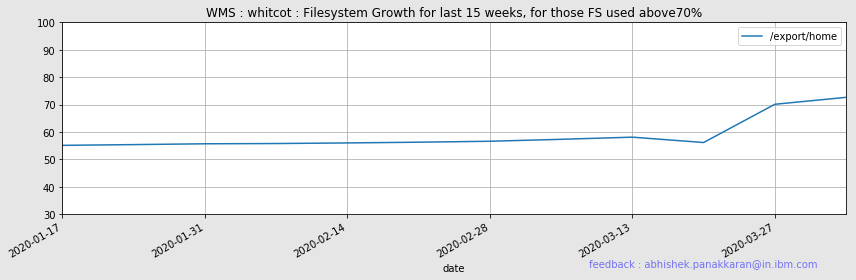

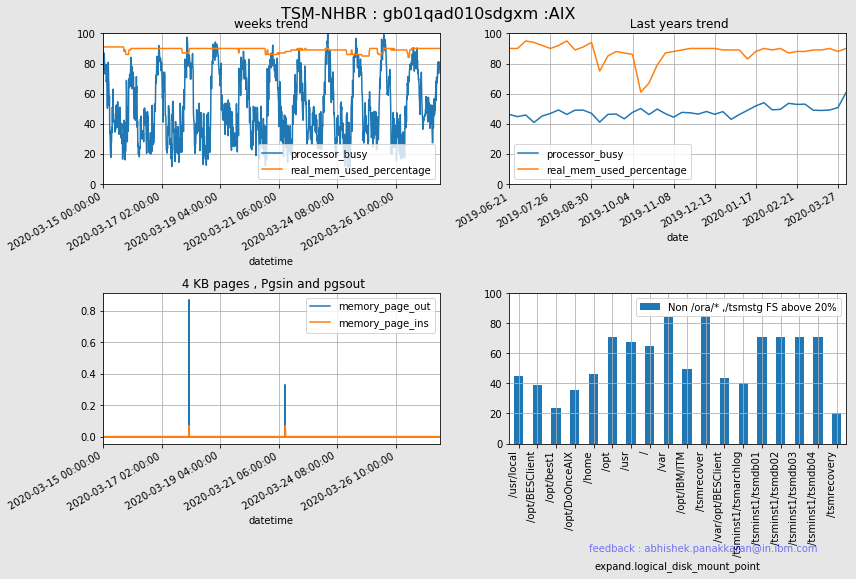

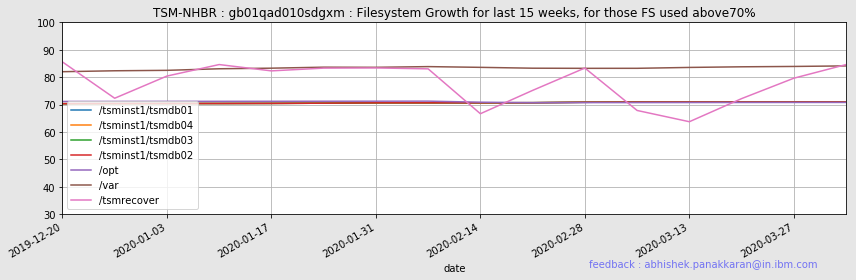

In [7]:
'''
Owner abhishek Panakkaran
individual server report server report
Where to use 
If there is a question to provide a report for SRM server for a 1 to 40 group of servers.
Output : It produce and output whith CPU , MEM , Swap , pages, filesystem trends
'''
import itertools
import pandas as pd
from getpass import getpass
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#pp = PdfPages(server_title +'.pdf')

day_str = str(pd.datetime.now().date())
finename = day_str + '_Abhisheks_server_analysis3.pdf'
pp = PdfPages(finename)


#import seaborn as sns
cred = pd.read_csv("cred.txt")
#soa_url= 'https://www-03.ibm.com/services/srm/SOA/Server?' # Internet URL. Need external userID "MARTIN DOSTAL"
soa_url = 'https://w3-03.ibm.com/services/srm/SOA/Server?' #This works fine from desktop
#soa_url = 'https://srmpregoldwww.boulder.ibm.com/services/srm/SOA/Server?'
account = 'account=[SO_UK,Shop_Direct_2019,none,none]'
#servernames_list = ['wilmslow','carleton','fairfield','fleetwood','aughton','beeston','linwood','milldale','tetton']
servernames_list = ['aughton','beeston']


def abhi_return_df_which_does_not_contain_this_string(df,df_column,string):
    df = df[~df[df_column].str.contains(string, regex= True, na=False)]
    return df


def abhi_read_input_data_from_local_directory():
    

    f = open('srm_account.txt')
    account = f.readline()
    f.close()
    f = open('cred.txt')
    cred = f.readline()
    p = getpass("Enter the password for {} : ".format(cred))
    cred = cred + p
    f.close()
    sl = pd.read_csv("server_list.txt",header=None)
    sl = pd.read_csv("server_list.txt",header=None,names=['server','app'])
    sl['Appserver'] = sl['app'] + " : " + sl['server']
    
    server_list= list(sl['server'])
    app_server_list = list(sl['Appserver'])

    #print("{} , {} , {}".format(cred,account,server_list))
    return cred,account,server_list,app_server_list

  


def abhi_plot_object_oriented_plt(weekdf,yeardf,swapdf,week_fs_df,server_title):
    
        global pp
        
        
        os = list(set(list(df_last_week['op_sys'])))[0].upper()

        fig , ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,8)) # enable this for swap charts 
        #fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(12,4))

    
        ax1.set_ylim(0, 100)
        ax2.set_ylim(0, 100)
        ax4.set_ylim(0, 100)
    
    
    
        weekdf.processor_busy.plot(ax=ax1, title = "weeks trend")
        if os =='AIX':
            weekdf.real_mem_used_percentage.plot(ax=ax1)
        elif os =='LINUX':    
            weekdf.memory_effective_used_percent.plot(ax=ax1)
        elif os =='SUN':
            weekdf.memory_used_percent.plot(ax=ax1)
        else:
            print("Cannot recognize OS")
            pass
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
        ax1.legend()
        ax1.grid(True)
        
        
    
    
        yeardf.processor_busy.plot(ax=ax2, title = " Last years trend")
        if os =='AIX':
            yeardf.real_mem_used_percentage.plot(ax=ax2)
        elif os =='LINUX':    
            yeardf.memory_effective_used_percent.plot(ax=ax2)
        elif os =='SUN':
            yeardf.memory_used_percent.plot(ax=ax2)
        else:
            print("Cannot recognize OS")
            pass
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
        ax2.legend()
        ax2.grid(True)
    
    
        weekdf.plot(ax=ax3,y=['memory_page_out','memory_page_ins'], title = " 4 KB pages , Pgsin and pgsout")
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')
        ax3.legend()
        ax3.grid(True)
    
    
        #swapdf.plot(ax=ax4,y=['swap_volume_size','swap_used'], title = " Swap MB used in last 90 days")
        week_fs_df.plot(ax=ax4,kind='bar',x='expand.logical_disk_mount_point',y='detail.physical_disk_fs_used_percent', label="Non /ora/* ,/tsmstg FS above 20%")
        ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90, ha='right')
        ax4.legend()
        ax4.grid(True)
        
        fig.suptitle(server_title + " :" + os ,size=16,y=1)
        fig.set_facecolor('.9')
        plt.tight_layout() # tight_layout prevent overlapping of x labels between 2 figures
        fig.text(0.95, 0.05, 'feedback : abhishek.panakkaran@in.ibm.com',
        fontsize=10, color='blue',
        ha='right', va='bottom', alpha=0.5) # adding watermark to charts
        #plt.show()
        plt.savefig(pp, format='pdf')
        #pp.close()
        #except:
            #pass

def read_swap_space(servername,cred,account):
        try:
            sn = "&server=" + servername
            q = soa_url + account + "&metric=[date,display_name,op_sys,swap_id,swap_volume_size,swap_used,swap_free,swap_percent_used]&frequency=day&os=allUnix&format=csv&date=[-94,-2]&sortby=[date,sub_client_id_1,sub_client_id_2,display_name]" + sn + cred
            df =pd.read_csv(q)
            df.index=df['date']
            return df
        except:
            pass
    
def read_soa_data_abhi_last_year(servername,cred,account):
        try:
            sn = "&server=" + servername
    #print(sn)
            q = soa_url + account + "&metric=[date,display_name,op_sys,processor_busy,processor_run_queue,pct_mem_avail_applications,memory_effective_used_percent,memory_used_percent,memory_page_ins,memory_page_out]&frequency=week&os=allUnix&shift=all&format=csv&date=[-41,-0]&sortby=[date,sub_client_id_1,sub_client_id_2,display_name]" + sn + cred
            df =pd.read_csv(q)
            df.index=df['date']
            df['real_mem_used_percentage']= (100 - df['pct_mem_avail_applications'])
            return df
        except:
            pass

def read_soa_data_abhi_last_7_days(servername,cred,account):
        try:
            sn = "&server=" + servername
    #print(sn)
            q = soa_url + account + "&metric=[date,time,display_name,op_sys,processor_busy,processor_run_queue,pct_mem_avail_applications,memory_effective_used_percent,memory_used_percent,memory_page_ins,memory_page_out]&frequency=15&os=allUnix&format=csv&date=[-16,-1]&sortby=[date,time,sub_client_id_1,sub_client_id_2,display_name]" + sn + cred
            df =pd.read_csv(q)
            df['datetime'] = df['date'] + " " + df['time']
            df.index = df['datetime']
            df['real_mem_used_percentage']= (100 - df['pct_mem_avail_applications'])
            print("Getting data for {}".format(servername))
            return df
        except:
            pass
        
def read_soa_data_abhi_filesystem_lastweek(servername,cred,account):
        try:
            sn = "&server=" + servername
    #print(sn)
            q = soa_url + account + "&metric=[date,display_name,detail.physical_disk_fs_disk_id,days,detail.physical_disk_fs_size,detail.physical_disk_fs_used,detail.physical_disk_fs_used_percent,detail.physical_disk_fs_free,detail.physical_disk_fs_free_percent,expand.logical_disk_mount_point]&frequency=week&os=allUnix&format=csv&date=[0,0]&sortby=[date,sub_client_id_1,sub_client_id_2,display_name]" + sn + cred
            df =pd.read_csv(q)
            df.index=df['date']
            
            # Filter away /ora/ string and _Total string and Return only whose % is greater than 70
            df = abhi_return_df_which_does_not_contain_this_string(df,'expand.logical_disk_mount_point','/ora/')
            df = abhi_return_df_which_does_not_contain_this_string(df,'detail.physical_disk_fs_disk_id','_Total')
            df = abhi_return_df_which_does_not_contain_this_string(df,'expand.logical_disk_mount_point','/tsmstg')
            df = df[df['detail.physical_disk_fs_used_percent'] > 20]

            #df['real_mem_used_percentage']= (100 - df['pct_mem_avail_applications'])
            #high_fs_list = set(df['detail.physical_disk_fs_disk_id'])
            return df#,high_fs_list
        except:
            pass       

def read_soa_data_abhi_filesystem_read_trend_for_last_15_weeks(servername,cred,account):
        try:
            sn = "&server=" + servername
    #print(sn)
            q = soa_url + account + "&metric=[date,display_name,detail.physical_disk_fs_disk_id,days,detail.physical_disk_fs_size,detail.physical_disk_fs_used,detail.physical_disk_fs_used_percent,detail.physical_disk_fs_free,detail.physical_disk_fs_free_percent,expand.logical_disk_mount_point]&frequency=week&os=allUnix&format=csv&date=[-15,-0]&sortby=[date,sub_client_id_1,sub_client_id_2,display_name]" + sn + cred
            df =pd.read_csv(q)
            df.index=df['date']
            
            # Filter away /ora/ string and _Total string 
            df = abhi_return_df_which_does_not_contain_this_string(df,'expand.logical_disk_mount_point','/ora/')
            df = abhi_return_df_which_does_not_contain_this_string(df,'detail.physical_disk_fs_disk_id','_Total')
            df = abhi_return_df_which_does_not_contain_this_string(df,'expand.logical_disk_mount_point','/tsmstg')
            #df = df[df['detail.physical_disk_fs_used_percent'] > 70]

            #df['real_mem_used_percentage']= (100 - df['pct_mem_avail_applications'])
            return df
        except:
            pass 

def abhi_plot_filesystem_graph_for_last_15_weeks(df,fs_list,servername): # This ploat draws last 15 weeks trend 
    global pp
    #fs_list = set(df['detail.physical_disk_fs_disk_id'])
    fig2, ax5 = plt.subplots(figsize=(12,4))
    

    for item in fs_list:
        #individual_fs_df = df[df['detail.physical_disk_fs_disk_id'] == item]
        individual_fs_df = df[df['expand.logical_disk_mount_point'] == item]
        
        individual_fs_df.plot(ax=ax5,y='detail.physical_disk_fs_used_percent',label=item,legend=True)
        ax5.set_xticklabels(ax5.get_xticklabels(), rotation=30, ha='right')
        ax5.legend()
        ax5.grid(True)
        ax5.set_title(servername +" : Filesystem Growth for last 15 weeks, for those FS used above70%")
        ax5.set_ylim(30, 100)
    #fig2.suptitle(servername,size=15,y=1)
    fig2.set_facecolor('.9')
    plt.tight_layout() # tight_layout prevent overlapping of x labels between 2 figures
    fig2.text(0.95, 0.05, 'feedback : abhishek.panakkaran@in.ibm.com',
    fontsize=10, color='blue',
    ha='right', va='bottom', alpha=0.5) # adding watermark to charts
    plt.savefig(pp, format='pdf')
#--------------------------------------------------------------------MAIN--------------------------------------------------------------------

#read the data from the text file

cred,account,servernames_list,app_server_list = abhi_read_input_data_from_local_directory()


#for sn , appname in servernames_list,app_server_list:
for (sn,an) in itertools.zip_longest(servernames_list, app_server_list): 
    
        df_filesystem_lastweek = read_soa_data_abhi_filesystem_lastweek(sn,cred,account)
        df_15weeks_fs_trend = read_soa_data_abhi_filesystem_read_trend_for_last_15_weeks(sn,cred,account)
        
        # below 3 lines of code will get the list of filesystems which consumes above 70% in last week
        try:
            df_filesystem_lastweek_70_pct = df_filesystem_lastweek[df_filesystem_lastweek['detail.physical_disk_fs_used_percent'] > 70]
            #high_fs_list_70plus = set(df_filesystem_lastweek_70_pct['detail.physical_disk_fs_disk_id'])
            high_fs_list_70plus = set(df_filesystem_lastweek_70_pct['expand.logical_disk_mount_point'])
            
            print("{} has {} filesystem consumed above 70%".format(sn,len(high_fs_list_70plus)))
        except:
            print("Passing {} as it does not have fs data above 70%".format(sn))
            pass
        
    # display CPU and Memory data for last 7 days
        df_last_week = read_soa_data_abhi_last_7_days(sn,cred,account)
    #-abhi_plot_cpu_mem(df_last_week, sn + " cpu and mem for last one week")
    
    # display CPU and Memory data for last year
        df_lyear = read_soa_data_abhi_last_year(sn,cred,account)
    #-abhi_plot_cpu_mem(df_lyear, sn + " cpu and mem for last one year")
    
    # display swap space data for a month
        df_swap = read_swap_space(sn,cred,account)
    #abhi_plot_swap(df_swap, sn + " Swap Used in MB last 2 months")
    
    # display page in and out for last week
    
    #-abhi_plot_pagein_pageout(df_last_week,sn + " last week memory 4kb pages in and out ")
    
        try:
            abhi_plot_object_oriented_plt(df_last_week,df_lyear,df_swap,df_filesystem_lastweek,an)
            if len(high_fs_list_70plus) > 0 :
                print("plotting {} filesystem trend for {}".format(len(high_fs_list_70plus),sn))
                abhi_plot_filesystem_graph_for_last_15_weeks(df_15weeks_fs_trend,high_fs_list_70plus,an)
            
            #plot.show()
        except:
            print("\nUnable to plot server '{}'. Doublecheck if '{}' data exist in SRM".format(sn,sn))
            pass
#clean up the data frame created
pp.close()
print("Completed...Check Abhisheks.pdf in the directory")
#del(df_last_week,df_lyear,df_swap)


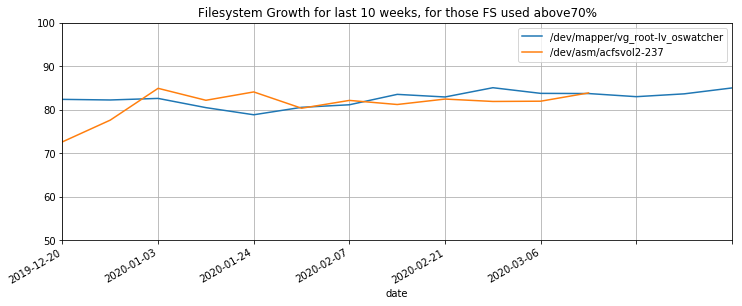

In [4]:
import pandas as pd


def read_soa_data_abhi_filesystem_read_trend_for_last_15_weeks(servername,cred,account):
        try:
            sn = "&server=" + servername
    #print(sn)
            q = soa_url + account + "&metric=[date,display_name,detail.physical_disk_fs_disk_id,days,detail.physical_disk_fs_size,detail.physical_disk_fs_used,detail.physical_disk_fs_used_percent,detail.physical_disk_fs_free,detail.physical_disk_fs_free_percent,expand.logical_disk_mount_point]&frequency=week&os=allUnix&format=csv&date=[-15,-0]&sortby=[date,sub_client_id_1,sub_client_id_2,display_name]" + sn + cred
            df =pd.read_csv(q)
            df.index=df['date']
            
            # Filter away /ora/ string and _Total string 
            df = abhi_return_df_which_does_not_contain_this_string(df,'expand.logical_disk_mount_point','/ora/')
            df = abhi_return_df_which_does_not_contain_this_string(df,'detail.physical_disk_fs_disk_id','_Total')
            #df = df[df['detail.physical_disk_fs_used_percent'] > 70]

            #df['real_mem_used_percentage']= (100 - df['pct_mem_avail_applications'])
            return df
        except:
            pass 
        
def abhi_plot_filesystem_graph_for_last_15_weeks(df,fs_list,servername): # This ploat draws last 15 weeks trend 
    global pp
    #fs_list = set(df['detail.physical_disk_fs_disk_id'])
    fig2, ax5 = plt.subplots(figsize=(12,4))
    

    for item in fs_list:
        individual_fs_df = df[df['detail.physical_disk_fs_disk_id'] == item]
        individual_fs_df.plot(ax=ax5,y='detail.physical_disk_fs_used_percent',label=item,legend=True)
        ax5.set_xticklabels(ax5.get_xticklabels(), rotation=30, ha='right')
        ax5.legend()
        ax5.grid(True)
        ax5.set_title(servername +" : Filesystem Growth for last 15 weeks, for those FS used above70%")
        ax5.set_ylim(50, 100)
    fig2.suptitle(servername,size=15,y=1)
    fig2.set_facecolor('.9')
    plt.tight_layout() # tight_layout prevent overlapping of x labels between 2 figures
    fig2.text(0.95, 0.05, 'feedback : abhishek.panakkaran@in.ibm.com',
    fontsize=10, color='blue',
    ha='right', va='bottom', alpha=0.5) # adding watermark to charts
    plt.savefig(pp, format='pdf')  


def abhi_plot_filesystem_last_10_weeks(df):
    fs_list = set(df['detail.physical_disk_fs_disk_id'])
    fig, ax1 = plt.subplots(figsize=(12,4))
    

    for item in fs_list:
        individual_fs_df = df[df['detail.physical_disk_fs_disk_id'] == item]
        individual_fs_df.plot(ax=ax1,y='detail.physical_disk_fs_used_percent',label=item,legend=True)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
        ax1.legend()
        ax1.grid(True)
        ax1.set_title("Filesystem Growth for last 10 weeks, for those FS used above70%")
        ax1.set_ylim(50, 100)
        #plt.show()
       
        
#plt.show() 
    
    

def read_soa_data_abhi_filesystem_growth_last_15_weeks(servername,cred,account):
        try:
            sn = "&server=" + servername
    #print(sn)
            q = soa_url + account + "&metric=[date,display_name,detail.physical_disk_fs_disk_id,days,detail.physical_disk_fs_size,detail.physical_disk_fs_used,detail.physical_disk_fs_used_percent,detail.physical_disk_fs_free,detail.physical_disk_fs_free_percent,expand.logical_disk_mount_point]&frequency=week&os=allUnix&format=csv&date=[-15,-0]&sortby=[date,sub_client_id_1,sub_client_id_2,display_name]" + sn + cred
            df =pd.read_csv(q)
            df.index=df['date']
            
            # Filter away /ora/ string and _Total string and Return only whose % is greater than 70
            df = abhi_return_df_which_does_not_contain_this_string(df,'expand.logical_disk_mount_point','/ora/')
            df = abhi_return_df_which_does_not_contain_this_string(df,'detail.physical_disk_fs_disk_id','_Total')
            df = df[df['detail.physical_disk_fs_used_percent'] > 70]

            #df['real_mem_used_percentage']= (100 - df['pct_mem_avail_applications'])
            return df
        except:
            pass   
        
df =  read_soa_data_abhi_filesystem_growth_last_15_weeks("port3015ovl",cred,account)

abhi_plot_filesystem_last_10_weeks(df)


    

In [41]:
import itertools
import pandas as pd
sl = pd.read_csv("server_list.txt",header=None,names=['server','app'])
sl['Appserver'] = sl['app'] + " : " + sl['server']

list1 = list(sl['server'])
list2 = list(sl['Appserver'])
    
for (a,b) in itertools.zip_longest (list1,list2):
    print(a,b)

itertools

aughton ATP : aughton
beeston ATP : beeston
aughton B2B_DirectDispatch : aughton
beeston B2B_DirectDispatch : beeston


<module 'itertools' (built-in)>

In [3]:
import numpy as np
import pandas as pd
scatterdb = pd.DataFrame(columns=['server', 'appl', 'cpu','mem'])
#scatterdb.append('server','app','34','45')
scatterdb = scatterdb.append({'server': "milldale", 'appl': 'CAM', 'cpu': 34 , 'mem':54 }, ignore_index=True)
scatterdb = scatterdb.append({'server': "linwood", 'appl': 'SAM', 'cpu': 45 , 'mem':50 }, ignore_index=True)

scatterdb.info()


cpu_list = [x for x in range(1,25,3)]
mem_list = [x for x in range(3,30,4)]

print("CPU array {}".format(cpu_list))
print("MEM array {}".format(mem_list))

cpu95 = np.percentile(cpu_list, 95)
mem90 = np.percentile(mem_list, 90)
server = "alfreton"
application = "mai"

scatterdb = scatterdb.append({'server': server, 'appl': application, 'cpu': cpu95 , 'mem':mem90 }, ignore_index=True)
scatterdb = scatterdb.append({'server': 'Aughton', 'appl': 'ATP', 'cpu': 70 , 'mem':45 }, ignore_index=True)
scatterdb = scatterdb.append({'server': "beeston", 'appl': "ATP", 'cpu': 95 , 'mem':mem90 }, ignore_index=True)
scatterdb = scatterdb.append({'server': "wilmslow", 'appl':'INTER','cpu': 45 , 'mem':80 }, ignore_index=True)


print("CPU95 {} : MEM95 {}".format(cpu95,mem90))

scatterdb.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
server    2 non-null object
appl      2 non-null object
cpu       2 non-null object
mem       2 non-null object
dtypes: object(4)
memory usage: 144.0+ bytes
CPU array [1, 4, 7, 10, 13, 16, 19, 22]
MEM array [3, 7, 11, 15, 19, 23, 27]
CPU95 20.95 : MEM95 24.6


AttributeError: 'DataFrame' object has no attribute 'groupgy'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
server    6 non-null object
appl      6 non-null object
cpu       6 non-null float64
mem       6 non-null float64
dtypes: float64(2), object(2)
memory usage: 272.0+ bytes
None


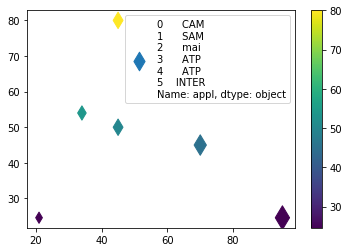

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

scatterdb['cpu'] = scatterdb['cpu'].apply(pd.to_numeric, errors='coerce')
scatterdb['mem'] = scatterdb['mem'].apply(pd.to_numeric, errors='coerce')

print(scatterdb.info())

#scatterdb.plot(kind='scatter',x='cpu', y='mem',marker='p');
#scatterdb.plot(x='cpu',y='mem',kind='scatter',marker='o',label="{}".format(scatterdb.server))
#plt.legend(numpoints=3)

plt.scatter(x=scatterdb['cpu'],y=scatterdb['mem'],marker='d',c=scatterdb.mem,s=scatterdb.cpu * 3,label=scatterdb.appl,cmap='viridis')
plt.colorbar()
plt.legend()



